In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine, Unit
#dbf
from dbfread import DBF
import seaborn as sns

In [5]:
# 데이터셋 불러오기

# subway데이터셋: 서울시 30분 단위 이용 통계(20~22년)
subway20 = pd.read_csv("data/subway20_df.csv")
subway21 = pd.read_csv("data/subway21_df.csv")
subway22 = pd.read_csv("data/subway22_df.csv")

# EXC데이터셋: 우수중소기업 공간데이터
EXC =  pd.read_csv("data/EXC_df.csv")

# TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)
TBVIATR = pd.read_csv("data/TBVIATR_df.csv")

# Seoul데이터셋: 서울시 지하철 시간대별 승객수(16~19년)
SEOUL17 = pd.read_csv("data/SEOUL17_df.csv")
SEOUL18 = pd.read_csv("data/SEOUL18_df.csv")
SEOUL19 = pd.read_csv("data/SEOUL19_df.csv")

# STATN데이터셋: 수도권 지하철 공간데이터(19년)
STATN19 = pd.read_csv("data/STATN19_df.csv")

# 서울시 버스정류장 공간데이터 #EPSG:5186
bus = DBF('data/버스/2019/TB_E_BUSSTOP_2019.dbf')
bus = pd.DataFrame(bus)

# 서울시 대학교 공간데이터
college = DBF('data/대학교 공간데이터/TL_UNIV_2020.dbf')
college = pd.DataFrame(college)

In [6]:
college

,UNIV_ID,STDR_YEAR,ELSM,UNIV_CD,UNIV_NM,BNHH_SN,UNIV_STTUS,LC,FOND,OLD_ZIP,ADRES,ENRL_ST_SM,ENRL_ST_CN,TMPABSSKL,TCHER_CN,TM_X,TM_Y
0,48110001.0,202004,대학원,,가톨릭대학교교회음악대학원,제3캠퍼스,기존,서울,사립,03083,"서울특별시종로구창경궁로296-12(혜화동,가톨릭대학교성신교정)",0.0,0.0,0.0,0.0,200377.582826,554053.289913
1,48110002.0,202004,대학원,,가톨릭대학교보건대학원,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540
2,48110003.0,202004,대학원,,가톨릭대학교생명대학원,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540
3,48110004.0,202004,대학원,,가톨릭대학교의료경영대학원,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540
4,48110005.0,202004,대학원,,가톨릭대학교의학전문대학원,제2캠퍼스,폐교,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,48110482.0,202004,대학원,,홍익대학교영상·커뮤니케이션대학원,본교,신설,서울,사립,04066,서울특별시마포구와우산로94(상수동)대학원교학팀,0.0,0.0,0.0,0.0,193430.815156,550136.749210
482,48110483.0,202004,대학원,,홍익대학교영상대학원,본교,폐교,서울,사립,04066,"서울특별시마포구와우산로94(상수동,홍익대학교)",0.0,0.0,0.0,0.0,193430.815156,550136.749210
483,48110484.0,202004,대학원,,홍익대학교패션대학원,본교,기존,서울,사립,04066,"서울특별시마포구와우산로94(상수동,홍익대학교)",0.0,0.0,0.0,0.0,193430.815156,550136.749210
484,48110485.0,202004,대학,7002340,홍익대학교,본교,기존,서울,사립,04066,"서울특별시마포구와우산로94(상수동,홍익대학교)",16877.0,12340.0,4537.0,557.0,193430.815156,550136.749210


In [7]:
subway21

,YEAR,MONTH,DAY,HOUR,HALF_HOUR,LINE_NM,STATION_NM,GETON_CNT,GETOFF_CNT
0,2021,1,1,4,30,1호선,서울역,2,0
1,2021,1,1,4,30,1호선,종각,1,0
2,2021,1,1,4,30,1호선,동대문,2,0
3,2021,1,1,4,30,1호선,신설동,5,0
4,2021,1,1,4,30,1호선,제기동,1,0
...,...,...,...,...,...,...,...,...,...
4708825,2021,12,31,23,30,우이신설선,북한산보국문,1,23
4708826,2021,12,31,23,30,우이신설선,정릉,2,28
4708827,2021,12,31,23,30,우이신설선,성신여대입구(돈암),0,1
4708828,2021,12,31,23,30,우이신설선,보문,6,10


In [8]:
a = subway21.groupby(subway21['HOUR']).sum()
a = a.reset_index()

In [9]:
a = a[['HOUR', 'GETON_CNT', 'GETOFF_CNT']]

In [10]:
a

,HOUR,GETON_CNT,GETOFF_CNT
0,0,17488,1502815
1,1,276,601
2,2,92,173
3,3,0,1
4,4,197685,6096
5,5,14998996,4091731
6,6,31883136,23348328
7,7,87316418,53329856
8,8,112575476,126191667
9,9,66403216,82192940


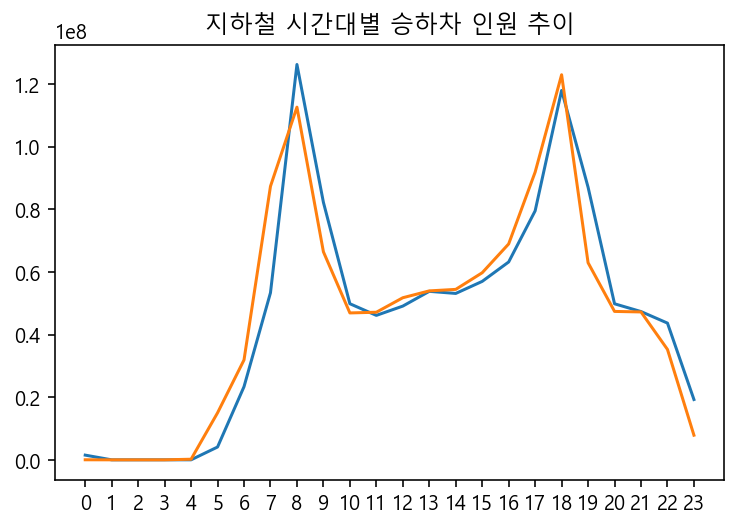

In [14]:
plt.title('지하철 시간대별 승하차 인원 추이')
plt.xticks(range(24))
# 초록색 하차
plt.plot(a['GETOFF_CNT'], label = '하차')
plt.plot(a['GETON_CNT'], label = '승차')

## 월별

In [15]:
b = subway21.groupby(subway21['MONTH']).sum()
b = b.reset_index()

In [16]:
b = b[['MONTH', 'GETON_CNT', 'GETOFF_CNT']]

In [17]:
b = b.set_index('MONTH')

In [18]:
b

,GETON_CNT,GETOFF_CNT
MONTH,,
1,79872784,79588507
2,80282542,79984277
3,99978380,99601858
4,98680884,98302348
5,96289468,95909223
6,99457445,99064366
7,88714742,88380149
8,84972263,84649575
9,85315032,84967530


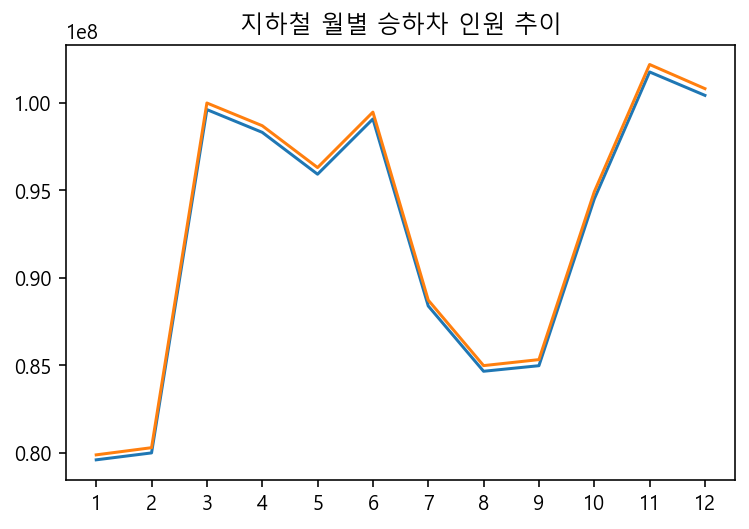

In [19]:
plt.title('지하철 월별 승하차 인원 추이')
plt.xticks(range(13))
# 초록색 하차
plt.plot(b['GETOFF_CNT'], label = '하차')
plt.plot(b['GETON_CNT'], label = '승차')

In [32]:
TBVIATR[TBVIATR['SCLASDC'].str.contains('극장', na=False)].reset_index(drop=True)

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,60205,300,AA0000000082,레저/관광/예술,문화/예술시설,공연/연극장,문화예술회관,NaN,금천희망문화회관,NaN,NaN,NaN,191598.930298,540149.399292,NaN,21212.0,NaN,NaN,NaN
1,NaN,60205,0,AA0000000097,레저/관광/예술,문화/예술시설,공연/연극장,미분류,NaN,수인아트홀,NaN,NaN,NaN,194510.272217,541947.154907,NaN,231640.0,NaN,NaN,NaN
2,NaN,60205,500,AA0000000130,레저/관광/예술,문화/예술시설,공연/연극장,문화센터,NaN,난곡경로문화센터,NaN,NaN,NaN,192778.482178,541226.406616,NaN,336741.0,NaN,NaN,NaN
3,NaN,60205,500,AA0000000150,레저/관광/예술,문화/예술시설,공연/연극장,문화센터,NaN,관악우정하이비전아파트우정하이비전주민문화센터,NaN,NaN,NaN,193785.202087,541403.910889,NaN,233343.0,NaN,NaN,NaN
4,NaN,60205,500,AA0000000213,레저/관광/예술,문화/예술시설,공연/연극장,문화센터,NaN,문화센터,NaN,NaN,NaN,191769.346008,540521.549072,NaN,422475.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,60205,0,AA0000019024,레저/관광/예술,문화/예술시설,공연/연극장,미분류,NaN,NaN,NaN,NaN,NaN,191171.682428,547396.398250,NaN,227420.0,NaN,NaN,NaN
244,NaN,60205,500,AA0000019042,레저/관광/예술,문화/예술시설,공연/연극장,문화센터,NaN,NaN,NaN,NaN,NaN,191453.388368,547302.210351,NaN,229987.0,NaN,NaN,NaN
245,NaN,60204,102,AA0000019100,레저/관광/예술,문화/예술시설,극장,일반영화관,롯데시네마,NaN,NaN,NaN,NaN,190194.996504,542030.759171,NaN,19619.0,NaN,NaN,NaN
246,NaN,60205,300,AA0000019370,레저/관광/예술,문화/예술시설,공연/연극장,문화예술회관,NaN,NaN,NaN,NaN,NaN,190441.460806,541050.183578,NaN,17914.0,NaN,NaN,NaN


## 서울시 버스정류장

In [33]:
bus

,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,TM_X,TM_Y,STTN_ARSNO
0,4799,100000001,버스,종로2가사거리,2019-07-30,198920.990795,552247.155925,01001
1,110,100000002,버스,창경궁.서울대학교병원,2019-07-30,199692.618782,553292.015192,01002
2,109,100000003,버스,명륜3가.성대입구,2019-07-30,199848.973782,553683.796125,01003
3,4796,100000004,버스,종로2가.삼일교,2019-07-30,198896.329903,552115.980102,01004
4,108,100000005,버스,혜화동로터리.여운형활동터,2019-07-30,200149.651139,554074.605152,01005
...,...,...,...,...,...,...,...,...
11175,14860,124000334,버스,우성아파트,2019-07-30,212311.649657,550111.679161,25995
11176,14861,124000333,버스,우성아파트,2019-07-30,212375.768437,550131.480643,25996
11177,14862,124000332,버스,조일약국,2019-07-30,210913.597545,548250.012112,25997
11178,14863,124000331,버스,성내시장,2019-07-30,211084.064779,548529.112440,25998


In [169]:
bus_s = bus[["TM_X", "TM_Y"]]
bus_s

,TM_X,TM_Y
0,198920.990795,552247.155925
1,199692.618782,553292.015192
2,199848.973782,553683.796125
3,198896.329903,552115.980102
4,200149.651139,554074.605152
...,...,...
11175,212311.649657,550111.679161
11176,212375.768437,550131.480643
11177,210913.597545,548250.012112
11178,211084.064779,548529.112440


In [170]:
# TM -> 위경도 변환 함수
#EPSG:5186
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [171]:
coord = np.array(bus)

In [172]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[-50.92542126, -32.39764821],
       [-50.8756159 , -32.39682726],
       [-50.87560507, -32.39683609],
       [-50.92538878, -32.39767472],
       [-50.87559403, -32.39685393]])

In [ ]:
전체["위도"] = result_imt[:, 1]
전체["경도"] = result_imt[:, 0]

## 잠실 1km 근처 집객시설

In [34]:
잠실 = STATN19[STATN19['STN_NM'].str.contains('잠실')]

In [35]:
TBVIATR.fillna('0')

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,0,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,0,"강덕초교,고덕그라시움버스정류장쉘터",0,0,0,214388.672913,551205.841919,0,156656.0,0,0,0
1,0,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,0,0,0,214555.910095,550962.356812,0,156617.0,0,0,0
2,0,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,0,서울강덕초등학교,0,0,0,214224.118713,550979.324829,0,156670.0,0,0,0
3,0,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,0,은빛어린이집,0,0,0,214171.512024,550841.469116,0,155226.0,0,0,0
4,0,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,0,0,0,214481.776611,550819.438110,0,155064.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456,0,30104,601,AA0000019457,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,0,0,0,0,191061.555317,544289.967983,0,226312.0,0,0,0
19457,0,30101,100,AA0000019458,교육/보건,교육시설,유아교육기관,어린이집,0,0,0,0,0,191005.451446,542730.985067,0,16022.0,0,0,0
19458,0,70301,200,AA0000019459,산업,서비스산업,종합상품판매업,할인매장,미분류,0,0,0,0,191354.443045,541322.297120,0,20337.0,0,0,0
19459,0,30201,800,AA0000019460,교육/보건,보건시설,병/의원,피부과,0,0,0,0,0,188687.329239,547251.976724,0,11699.0,0,0,0


In [36]:
전체 = TBVIATR[['LCLASDC','MLSFCDC', 'SCLASDC', 'DCLASDC', 'BCLASDC', 'VIAT_NM', "X_VALUE", "Y_VALUE"]]

In [37]:
전체

,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE
0,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",214388.672913,551205.841919
1,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214555.910095,550962.356812
2,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,214224.118713,550979.324829
3,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,214171.512024,550841.469116
4,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214481.776611,550819.438110
...,...,...,...,...,...,...,...,...
19456,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,191061.555317,544289.967983
19457,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,191005.451446,542730.985067
19458,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,191354.443045,541322.297120
19459,교육/보건,보건시설,병/의원,피부과,NaN,NaN,188687.329239,547251.976724


In [38]:
TBVI = TBVIATR[["X_VALUE", "Y_VALUE"]]
TBVI

,X_VALUE,Y_VALUE
0,214388.672913,551205.841919
1,214555.910095,550962.356812
2,214224.118713,550979.324829
3,214171.512024,550841.469116
4,214481.776611,550819.438110
...,...,...
19456,191061.555317,544289.967983
19457,191005.451446,542730.985067
19458,191354.443045,541322.297120
19459,188687.329239,547251.976724


In [39]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [40]:
coord = np.array(TBVI)

In [41]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.16285188,  37.56027027],
       [127.16473985,  37.55807386],
       [127.16098506,  37.55823192],
       [127.16038702,  37.55699066],
       [127.16389801,  37.55678734]])

In [42]:
전체["위도"] = result_imt[:, 1]
전체["경도"] = result_imt[:, 0]

In [43]:
전체

,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",214388.672913,551205.841919,37.560270,127.162852
1,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214555.910095,550962.356812,37.558074,127.164740
2,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,214224.118713,550979.324829,37.558232,127.160985
3,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,214171.512024,550841.469116,37.556991,127.160387
4,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214481.776611,550819.438110,37.556787,127.163898
...,...,...,...,...,...,...,...,...,...,...
19456,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,191061.555317,544289.967983,37.498027,126.898918
19457,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,191005.451446,542730.985067,37.483980,126.898303
19458,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,191354.443045,541322.297120,37.471291,126.902265
19459,교육/보건,보건시설,병/의원,피부과,NaN,NaN,188687.329239,547251.976724,37.524689,126.872023


In [44]:
잠실21 = np.array(전체[['위도', '경도']])

In [45]:
잠실21

array([[ 37.56027027, 127.16285188],
       [ 37.55807386, 127.16473985],
       [ 37.55823192, 127.16098506],
       ...,
       [ 37.47129106, 126.90226514],
       [ 37.52468894, 126.87202331],
       [ 37.52722912, 127.03309306]])

In [46]:
잠실12 = 잠실[['TM_X','TM_Y']]

In [47]:
잠실12

,TM_X,TM_Y
413,209174.0416,546815.9817
414,209037.3240,546063.0841
415,207616.8143,545810.5243
504,209037.3240,546063.0841


In [48]:
coord = np.array(잠실12)

In [49]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.10377765,  37.52078436],
       [127.10222183,  37.51400208],
       [127.08615175,  37.51173932],
       [127.10222183,  37.51400208]])

In [50]:
print("잠실 근처\n")
lid = []

lyon = (37.51400208, 127.10222183)
for c, d in 잠실21:
    paris=(c, d)
    A = haversine(lyon, paris) < 1
    if A is True:
        lid.append([c, d])
lid

잠실 근처



[[37.515415626693816, 127.11330138649348],
 [37.51671772784809, 127.11206926337015],
 [37.51647875285315, 127.11284229759228],
 [37.51620392911205, 127.11158930005244],
 [37.50573643388865, 127.10313324740581],
 [37.50637756512216, 127.10307266208616],
 [37.51617231428664, 127.1130081138403],
 [37.51613298558977, 127.11048363921745],
 [37.516172729434906, 127.11079367661445],
 [37.5110370073483, 127.11156769765859],
 [37.506329026198614, 127.10057039395416],
 [37.506882949382415, 127.10102866931321],
 [37.50733597903306, 127.10971986611094],
 [37.51559182478677, 127.11004371492271],
 [37.51494176752691, 127.10930475499919],
 [37.51602313578101, 127.11003698729075],
 [37.51587212724441, 127.11009868803379],
 [37.51581543433617, 127.10996017128427],
 [37.5157025049935, 127.11000959343457],
 [37.50707132743568, 127.10156581797771],
 [37.5061077722957, 127.10151178606554],
 [37.5069927000511, 127.1013732341574],
 [37.506920035107925, 127.10214120605897],
 [37.51342009563416, 127.1078695654

In [51]:
잠실1k = pd.DataFrame(lid)

In [52]:
전체.value_counts()

LCLASDC  MLSFCDC  SCLASDC    DCLASDC  BCLASDC  VIAT_NM        X_VALUE        Y_VALUE        위도         경도        
교육/보건    보건시설     기타보건시설     약국       미분류      풍납빌딩다사랑약국      210164.753723  547301.916992  37.525152  127.114991    2
산업       서비스산업    금융/보험업     일반은행     새마을금고    MG새마을금고서울은평지점  193974.927612  556925.619690  37.611898  126.931761    1
                                               MG새마을금고신공덕점    196030.770508  549603.149475  37.545934  126.955085    1
                                               MG새마을금고시흥지점    191362.619080  539433.808228  37.454276  126.902380    1
                                               MG새마을금고시흥1지점   191615.466125  540061.332520  37.459932  126.905230    1
                                                                                                                    ..
교육/보건    보건시설     기타보건시설     약국       미분류      메디칼약국          188229.121826  544475.425171  37.499666  126.866884    1
                                               메디칼수약국

In [53]:
전체.drop_duplicates(['위도','경도']).value_counts()

LCLASDC  MLSFCDC  SCLASDC    DCLASDC  BCLASDC  VIAT_NM              X_VALUE        Y_VALUE        위도         경도        
교육/보건    교육시설     고등교육기관     기술학교     직업훈련소    KT공항빌딩한국에어텍항공직업전문학교  183660.881592  551335.386597  37.561405  126.815070    1
산업       서비스산업    금융/보험업     일반은행     새마을금고    MG새마을금고서울은평지점        193974.927612  556925.619690  37.611898  126.931761    1
                                               MG새마을금고신공덕점          196030.770508  549603.149475  37.545934  126.955085    1
                                               MG새마을금고시흥지점          191362.619080  539433.808228  37.454276  126.902380    1
                                               MG새마을금고시흥1지점         191615.466125  540061.332520  37.459932  126.905230    1
                                                                                                                          ..
교육/보건    보건시설     기타보건시설     약국       미분류      메디칼약국                188229.121826  544475.425171  37.499666  126.866884    1
     

In [54]:
s = 전체.drop_duplicates(['위도','경도'])

In [55]:
s

,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",214388.672913,551205.841919,37.560270,127.162852
1,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214555.910095,550962.356812,37.558074,127.164740
2,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,214224.118713,550979.324829,37.558232,127.160985
3,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,214171.512024,550841.469116,37.556991,127.160387
4,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214481.776611,550819.438110,37.556787,127.163898
...,...,...,...,...,...,...,...,...,...,...
19456,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,191061.555317,544289.967983,37.498027,126.898918
19457,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,191005.451446,542730.985067,37.483980,126.898303
19458,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,191354.443045,541322.297120,37.471291,126.902265
19459,교육/보건,보건시설,병/의원,피부과,NaN,NaN,188687.329239,547251.976724,37.524689,126.872023


In [56]:
잠실1k = 잠실1k.rename(columns = {0:'위도', 1:'경도'})

In [57]:
전체

,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",214388.672913,551205.841919,37.560270,127.162852
1,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214555.910095,550962.356812,37.558074,127.164740
2,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,214224.118713,550979.324829,37.558232,127.160985
3,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,214171.512024,550841.469116,37.556991,127.160387
4,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214481.776611,550819.438110,37.556787,127.163898
...,...,...,...,...,...,...,...,...,...,...
19456,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,191061.555317,544289.967983,37.498027,126.898918
19457,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,191005.451446,542730.985067,37.483980,126.898303
19458,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,191354.443045,541322.297120,37.471291,126.902265
19459,교육/보건,보건시설,병/의원,피부과,NaN,NaN,188687.329239,547251.976724,37.524689,126.872023


In [58]:
잠실근처 = 전체.append(잠실1k)

In [59]:
잠실근처 = 잠실근처.drop_duplicates()
잠실근처

,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",214388.672913,551205.841919,37.560270,127.162852
1,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214555.910095,550962.356812,37.558074,127.164740
2,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,214224.118713,550979.324829,37.558232,127.160985
3,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,214171.512024,550841.469116,37.556991,127.160387
4,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,214481.776611,550819.438110,37.556787,127.163898
...,...,...,...,...,...,...,...,...,...,...
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.522124,127.106987
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.515923,127.109007
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.520885,127.104436
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.519309,127.101050


In [60]:
잠실근처 = 잠실근처[잠실근처.duplicated(['위도','경도'],  keep = 'last')].reset_index()

In [61]:
잠실근처

,index,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,3482,행정,지방행정기관,지방행정집행기관,동주민센터,NaN,쌍문제2동주민센터,203426.688171,562034.512085,37.657941,127.038834
1,10558,교육/보건,보건시설,병/의원,미분류,NaN,현대주상복합아파트베데스다의원,210016.667114,546221.091675,37.515416,127.113301
2,10559,숙박/음식,숙박시설,기타숙박시설,NaN,NaN,잠실소풍모텔,209907.566284,546365.478027,37.516718,127.112069
3,10584,숙박/음식,숙박시설,기타숙박시설,NaN,NaN,필름372호텔,209975.938782,546339.036499,37.516479,127.112842
4,10586,숙박/음식,숙박시설,기타숙박시설,NaN,NaN,더뷰호텔,209865.202393,546308.402405,37.516204,127.111589
...,...,...,...,...,...,...,...,...,...,...,...
98,17979,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,NaN,209457.619806,546965.029328,37.522124,127.106987
99,17980,교육/보건,보건시설,병/의원,미분류,NaN,NaN,209636.989233,546276.902159,37.515923,127.109007
100,17984,산업,서비스산업,금융/보험업,일반은행,국민은행,NaN,209232.267840,546827.193130,37.520885,127.104436
101,18004,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,208933.067272,546651.937981,37.519309,127.101050


In [62]:
잠실근처['LCLASDC'].value_counts()

교육/보건       46
숙박/음식       35
산업          15
행정           5
레저/관광/예술     2
Name: LCLASDC, dtype: int64

In [63]:
잠실근처['MLSFCDC'].value_counts()

숙박시설       35
교육시설       24
보건시설       22
서비스산업      15
지방행정기관      5
문화/예술시설     2
Name: MLSFCDC, dtype: int64

In [64]:
잠실근처['SCLASDC'].value_counts()

기타숙박시설      35
유아교육기관      16
병/의원        11
종합상품판매업     11
기타보건시설       6
지방행정집행기관     5
한의원          5
금융/보험업       4
초등교육기관       4
중등교육기관       2
기타교육기관       1
공연/연극장       1
극장           1
고등교육기관       1
Name: SCLASDC, dtype: int64

In [65]:
잠실근처['DCLASDC'].value_counts()

어린이집      15
미분류       11
대형상가       8
약국         6
공립초등학교     4
동주민센터      3
일반은행       3
공립중학교      2
할인매장       2
구청         1
사립유치원      1
특수학교       1
피부과        1
백화점        1
생명보험       1
문화예술회관     1
일반영화관      1
공립고등학교     1
Name: DCLASDC, dtype: int64

In [66]:
잠_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [67]:
for item in 잠실근처.index:
    lat = 잠실근처.loc[item, '위도']
    long = 잠실근처.loc[item, '경도']
    g.Marker([lat, long],
             fill = True).add_to(잠_map)
    
잠_map


In [74]:
TBVIATR

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456,NaN,30104,601,AA0000019457,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,NaN,NaN,NaN,191061.555317,544289.967983,NaN,226312.0,NaN,NaN,NaN
19457,NaN,30101,100,AA0000019458,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,NaN,NaN,NaN,191005.451446,542730.985067,NaN,16022.0,NaN,NaN,NaN
19458,NaN,70301,200,AA0000019459,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,NaN,NaN,NaN,191354.443045,541322.297120,NaN,20337.0,NaN,NaN,NaN
19459,NaN,30201,800,AA0000019460,교육/보건,보건시설,병/의원,피부과,NaN,NaN,NaN,NaN,NaN,188687.329239,547251.976724,NaN,11699.0,NaN,NaN,NaN


## 백화점

In [79]:
DepartmentStore = TBVIATR[TBVIATR['DCLASDC'].str.contains('백화점', na=False)].reset_index(drop=True)

In [80]:
DepartmentStore.head(50)

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,70301,107,AA0000000036,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"청량리역,롯데백화점",NaN,NaN,NaN,204288.191589,552900.729614,NaN,336492.0,NaN,NaN,NaN
1,NaN,70301,104,AA0000000546,산업,서비스산업,종합상품판매업,백화점,신세계백화점,신세계백화점,NaN,NaN,NaN,191660.925110,546396.875122,NaN,228430.0,NaN,NaN,NaN
2,NaN,70301,104,AA0000000579,산업,서비스산업,종합상품판매업,백화점,신세계백화점,신세계백화점리빙관,NaN,NaN,NaN,191655.123108,546416.015198,NaN,228430.0,NaN,NaN,NaN
3,NaN,70301,107,AA0000000825,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"영등포역,롯데백화점영등포점,롯데시네마",NaN,NaN,NaN,191833.828491,546246.627502,NaN,418120.0,NaN,NaN,NaN
4,NaN,70301,104,AA0000000830,산업,서비스산업,종합상품판매업,백화점,신세계백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",NaN,NaN,NaN,191507.225098,546419.940308,NaN,228430.0,NaN,NaN,NaN
5,NaN,70301,107,AA0000001613,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"보라매롯데캐슬아파트롯데백화점관악점,산성교회,이마트",NaN,NaN,NaN,193367.347595,543455.136780,NaN,230442.0,NaN,NaN,NaN
6,NaN,70301,110,AA0000002608,산업,서비스산업,종합상품판매업,백화점,현대백화점,"금강쇼핑센터(주)현대백화점,우리은행압구정현대지점,N마켓",NaN,NaN,NaN,202635.681274,547874.749695,NaN,30705.0,NaN,NaN,NaN
7,NaN,70301,110,AA0000002700,산업,서비스산업,종합상품판매업,백화점,현대백화점,현대백화점문화센터토파즈홀주차타워,NaN,NaN,NaN,202445.545776,547671.875427,NaN,30902.0,NaN,NaN,NaN
8,NaN,70301,110,AA0000002705,산업,서비스산업,종합상품판매업,백화점,현대백화점,현대백화점,NaN,NaN,NaN,202428.444702,547542.197510,NaN,303460.0,NaN,NaN,NaN
9,NaN,70301,102,AA0000002825,산업,서비스산업,종합상품판매업,백화점,갤러리아백화점,갤러리아백화점,NaN,NaN,NaN,203699.243774,547604.113525,NaN,24418.0,NaN,NaN,NaN


In [81]:
DepartmentStore

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,70301,107,AA0000000036,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"청량리역,롯데백화점",NaN,NaN,NaN,204288.191589,552900.729614,NaN,336492.0,NaN,NaN,NaN
1,NaN,70301,104,AA0000000546,산업,서비스산업,종합상품판매업,백화점,신세계백화점,신세계백화점,NaN,NaN,NaN,191660.925110,546396.875122,NaN,228430.0,NaN,NaN,NaN
2,NaN,70301,104,AA0000000579,산업,서비스산업,종합상품판매업,백화점,신세계백화점,신세계백화점리빙관,NaN,NaN,NaN,191655.123108,546416.015198,NaN,228430.0,NaN,NaN,NaN
3,NaN,70301,107,AA0000000825,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"영등포역,롯데백화점영등포점,롯데시네마",NaN,NaN,NaN,191833.828491,546246.627502,NaN,418120.0,NaN,NaN,NaN
4,NaN,70301,104,AA0000000830,산업,서비스산업,종합상품판매업,백화점,신세계백화점,"타임스퀘어코트야드메리어트호텔,신세계백화점패션관,KEB하나은행영등포지점,CG",NaN,NaN,NaN,191507.225098,546419.940308,NaN,228430.0,NaN,NaN,NaN
5,NaN,70301,107,AA0000001613,산업,서비스산업,종합상품판매업,백화점,롯데백화점,"보라매롯데캐슬아파트롯데백화점관악점,산성교회,이마트",NaN,NaN,NaN,193367.347595,543455.136780,NaN,230442.0,NaN,NaN,NaN
6,NaN,70301,110,AA0000002608,산업,서비스산업,종합상품판매업,백화점,현대백화점,"금강쇼핑센터(주)현대백화점,우리은행압구정현대지점,N마켓",NaN,NaN,NaN,202635.681274,547874.749695,NaN,30705.0,NaN,NaN,NaN
7,NaN,70301,110,AA0000002700,산업,서비스산업,종합상품판매업,백화점,현대백화점,현대백화점문화센터토파즈홀주차타워,NaN,NaN,NaN,202445.545776,547671.875427,NaN,30902.0,NaN,NaN,NaN
8,NaN,70301,110,AA0000002705,산업,서비스산업,종합상품판매업,백화점,현대백화점,현대백화점,NaN,NaN,NaN,202428.444702,547542.197510,NaN,303460.0,NaN,NaN,NaN
9,NaN,70301,102,AA0000002825,산업,서비스산업,종합상품판매업,백화점,갤러리아백화점,갤러리아백화점,NaN,NaN,NaN,203699.243774,547604.113525,NaN,24418.0,NaN,NaN,NaN


In [82]:
DepartmentStore = DepartmentStore[["X_VALUE", "Y_VALUE"]]
DepartmentStore

,X_VALUE,Y_VALUE
0,204288.191589,552900.729614
1,191660.925110,546396.875122
2,191655.123108,546416.015198
3,191833.828491,546246.627502
4,191507.225098,546419.940308
5,193367.347595,543455.136780
6,202635.681274,547874.749695
7,202445.545776,547671.875427
8,202428.444702,547542.197510
9,203699.243774,547604.113525


In [83]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [84]:
coord = np.array(DepartmentStore)

In [85]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.04854401,  37.57564347],
       [126.90567232,  37.51701612],
       [126.90560647,  37.51718852],
       [126.90762979,  37.51566393],
       [126.90393347,  37.51722253]])

In [86]:
DepartmentStore["위도"] = result_imt[:, 1]
DepartmentStore["경도"] = result_imt[:, 0]

In [87]:
DepartmentStore

,X_VALUE,Y_VALUE,위도,경도
0,204288.191589,552900.729614,37.575643,127.048544
1,191660.925110,546396.875122,37.517016,126.905672
2,191655.123108,546416.015198,37.517189,126.905606
3,191833.828491,546246.627502,37.515664,126.907630
4,191507.225098,546419.940308,37.517223,126.903933
5,193367.347595,543455.136780,37.490525,126.925001
6,202635.681274,547874.749695,37.530366,127.029819
7,202445.545776,547671.875427,37.528538,127.027667
8,202428.444702,547542.197510,37.527370,127.027473
9,203699.243774,547604.113525,37.527924,127.041850


In [88]:
d_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [89]:
for item in DepartmentStore.index:
    lat = DepartmentStore.loc[item, '위도']
    long = DepartmentStore.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(d_map)
d_map

## 대형 상가

In [90]:
TBVIATR

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456,NaN,30104,601,AA0000019457,교육/보건,교육시설,고등교육기관,기술학교,직업훈련소,NaN,NaN,NaN,NaN,191061.555317,544289.967983,NaN,226312.0,NaN,NaN,NaN
19457,NaN,30101,100,AA0000019458,교육/보건,교육시설,유아교육기관,어린이집,NaN,NaN,NaN,NaN,NaN,191005.451446,542730.985067,NaN,16022.0,NaN,NaN,NaN
19458,NaN,70301,200,AA0000019459,산업,서비스산업,종합상품판매업,할인매장,미분류,NaN,NaN,NaN,NaN,191354.443045,541322.297120,NaN,20337.0,NaN,NaN,NaN
19459,NaN,30201,800,AA0000019460,교육/보건,보건시설,병/의원,피부과,NaN,NaN,NaN,NaN,NaN,188687.329239,547251.976724,NaN,11699.0,NaN,NaN,NaN


In [91]:
Largeshoppingmall = TBVIATR[TBVIATR['DCLASDC'].str.contains('대형상가', na=False)].reset_index(drop=True)

In [92]:
Largeshoppingmall.drop_duplicates(['VIAT_NM'])

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,70301,302,AA0000000006,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,그라시움상가,NaN,NaN,NaN,214465.779480,551177.935486,NaN,156674.0,NaN,NaN,NaN
3,NaN,70301,302,AA0000000014,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,헬리오시티아파트헬리오시티상가,NaN,NaN,NaN,209909.848877,544369.669189,NaN,154281.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000092,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,금호상가,NaN,NaN,NaN,194327.121887,541782.493896,NaN,227290.0,NaN,NaN,NaN
5,NaN,70301,302,AA0000000229,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,"꿈나라상가,꿈나라유치원,그랜드음악학원,휴먼시아해법영어교습소,현",NaN,NaN,NaN,192979.249573,540127.664917,NaN,227361.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,NaN,70301,302,AA0000016350,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,삼성테마트상가,NaN,NaN,NaN,195599.857971,548294.742126,NaN,208772.0,NaN,NaN,NaN
311,NaN,70301,302,AA0000016369,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,정우맨션정우상가,NaN,NaN,NaN,195350.985107,549233.503906,NaN,224735.0,NaN,NaN,NaN
312,NaN,70301,302,AA0000016397,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,선인상가,NaN,NaN,NaN,196913.506775,548133.262573,NaN,174339.0,NaN,NaN,NaN
313,NaN,70301,302,AA0000016485,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,파비상가,NaN,NaN,NaN,195239.414490,551102.145691,NaN,223800.0,NaN,NaN,NaN


In [93]:
Largeshoppingmall = Largeshoppingmall[["X_VALUE", "Y_VALUE"]]
Largeshoppingmall

,X_VALUE,Y_VALUE
0,214555.910095,550962.356812
1,214481.776611,550819.438110
2,214465.779480,551177.935486
3,209909.848877,544369.669189
4,194327.121887,541782.493896
...,...,...
374,187748.334053,544315.548921
375,190485.190453,546261.544233
376,187350.587333,544258.613080
377,188074.971844,545356.930130


In [94]:
coord = np.array(Largeshoppingmall)

In [95]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.16473985,  37.55807386],
       [127.16389801,  37.55678734],
       [127.16372403,  37.56001763],
       [127.1120682 ,  37.4987354 ],
       [126.93586662,  37.47546049]])

In [96]:
Largeshoppingmall["위도"] = result_imt[:, 1]
Largeshoppingmall["경도"] = result_imt[:, 0]

In [97]:
Largeshoppingmall

,X_VALUE,Y_VALUE,위도,경도
0,214555.910095,550962.356812,37.558074,127.164740
1,214481.776611,550819.438110,37.556787,127.163898
2,214465.779480,551177.935486,37.560018,127.163724
3,209909.848877,544369.669189,37.498735,127.112068
4,194327.121887,541782.493896,37.475460,126.935867
...,...,...,...,...
374,187748.334053,544315.548921,37.498220,126.861450
375,190485.190453,546261.544233,37.515785,126.892375
376,187350.587333,544258.613080,37.497701,126.856953
377,188074.971844,545356.930130,37.507607,126.865127


In [98]:
l_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [99]:
for item in Largeshoppingmall.index:
    lat = Largeshoppingmall.loc[item, '위도']
    long = Largeshoppingmall.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(l_map)
l_map

## 대학병원

In [100]:
universityHospital = TBVIATR[TBVIATR['VIAT_NM'].str.contains('대학교병원', na=False)].reset_index(drop=True)

In [101]:
universityHospital.drop_duplicates(['VIAT_NM'])

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30201,0,AA0000000053,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원대한외래2,NaN,NaN,NaN,199876.387695,553249.678101,NaN,353588.0,NaN,NaN,NaN
1,NaN,30201,0,AA0000000054,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원,NaN,NaN,NaN,200021.736084,553232.350830,NaN,353588.0,NaN,NaN,NaN
2,NaN,30201,0,AA0000000055,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원대한외래,NaN,NaN,NaN,200001.068481,553244.112488,NaN,353588.0,NaN,NaN,NaN
3,NaN,30201,0,AA0000002099,교육/보건,보건시설,병/의원,미분류,NaN,중앙대학교병원장례식장,NaN,NaN,NaN,196491.037292,545237.398621,NaN,23074.0,NaN,NaN,NaN
4,NaN,30201,0,AA0000002101,교육/보건,보건시설,병/의원,미분류,NaN,중앙대학교병원중앙관,NaN,NaN,NaN,196535.021118,545261.969727,NaN,23074.0,NaN,NaN,NaN
5,NaN,30201,0,AA0000002112,교육/보건,보건시설,병/의원,미분류,NaN,중앙대학교병원다정관,NaN,NaN,NaN,196499.925476,545176.452209,NaN,23074.0,NaN,NaN,NaN
6,NaN,30201,0,AA0000006854,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원장례식장,NaN,NaN,NaN,199730.518616,553469.639771,NaN,353588.0,NaN,NaN,NaN
7,NaN,30201,0,AA0000007266,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원주차빌딩,NaN,NaN,NaN,199729.785278,553379.125610,NaN,353588.0,NaN,NaN,NaN
9,NaN,30201,0,AA0000007268,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원응급의료센터,NaN,NaN,NaN,200002.474426,553374.121521,NaN,353588.0,NaN,NaN,NaN
10,NaN,30201,0,AA0000007516,교육/보건,보건시설,병/의원,미분류,NaN,경희대학교병원,NaN,NaN,NaN,204540.339783,554929.487976,NaN,340808.0,NaN,NaN,NaN


In [102]:
universityHospital = universityHospital[["X_VALUE", "Y_VALUE"]]
universityHospital

,X_VALUE,Y_VALUE
0,199876.387695,553249.678101
1,200021.736084,553232.350830
2,200001.068481,553244.112488
3,196491.037292,545237.398621
4,196535.021118,545261.969727
5,196499.925476,545176.452209
6,199730.518616,553469.639771
7,199729.785278,553379.125610
8,199909.610718,553346.323486
9,200002.474426,553374.121521


In [103]:
coord = np.array(universityHospital)

In [104]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[126.9986006 ,  37.57879745],
       [127.00024607,  37.57864134],
       [127.0000121 ,  37.57874731],
       [126.96031378,  37.50660018],
       [126.96081112,  37.50682174]])

In [105]:
universityHospital["위도"] = result_imt[:, 1]
universityHospital["경도"] = result_imt[:, 0]

In [106]:
universityHospital

,X_VALUE,Y_VALUE,위도,경도
0,199876.387695,553249.678101,37.578797,126.998601
1,200021.736084,553232.350830,37.578641,127.000246
2,200001.068481,553244.112488,37.578747,127.000012
3,196491.037292,545237.398621,37.506600,126.960314
4,196535.021118,545261.969727,37.506822,126.960811
5,196499.925476,545176.452209,37.506051,126.960415
6,199730.518616,553469.639771,37.580779,126.996949
7,199729.785278,553379.125610,37.579964,126.996941
8,199909.610718,553346.323486,37.579668,126.998977
9,200002.474426,553374.121521,37.579919,127.000028


In [107]:
h_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [108]:
for item in universityHospital.index:
    lat = universityHospital.loc[item, '위도']
    long = universityHospital.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(h_map)
h_map

In [109]:
universityHospital = np.array(universityHospital[['위도', '경도']])

In [110]:
# 역별로 병/의원 시설의 개수

print("대학병원\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in universityHospital:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

대학병원



NameError: name 'result_sub' is not defined

## 병/의원

In [111]:
medicalFacilities = TBVIATR[TBVIATR['SCLASDC'].str.contains('병/의원', na=False)].reset_index(drop=True)

In [112]:
medicalFacilities

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30201,0,AA0000000028,교육/보건,보건시설,병/의원,미분류,NaN,중계9단지주공아파트늘사랑의원,NaN,NaN,NaN,206512.493896,560285.915527,NaN,364999.0,NaN,NaN,NaN
1,NaN,30201,0,AA0000000031,교육/보건,보건시설,병/의원,미분류,NaN,"진경환내과의원,참이비인후과의원,동부외과의원,면목그랜드약국",NaN,NaN,NaN,207888.823303,553422.253418,NaN,212971.0,NaN,NaN,NaN
2,NaN,30201,0,AA0000000053,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원대한외래2,NaN,NaN,NaN,199876.387695,553249.678101,NaN,353588.0,NaN,NaN,NaN
3,NaN,30201,0,AA0000000054,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원,NaN,NaN,NaN,200021.736084,553232.350830,NaN,353588.0,NaN,NaN,NaN
4,NaN,30201,0,AA0000000055,교육/보건,보건시설,병/의원,미분류,NaN,서울대학교병원대한외래,NaN,NaN,NaN,200001.068481,553244.112488,NaN,353588.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,NaN,30201,1400,AA0000019440,교육/보건,보건시설,병/의원,정형외과,NaN,NaN,NaN,NaN,NaN,196964.249482,541837.027157,NaN,231085.0,NaN,NaN,NaN
3801,NaN,30201,0,AA0000019443,교육/보건,보건시설,병/의원,미분류,NaN,NaN,NaN,NaN,NaN,191464.205208,540497.838689,NaN,20046.0,NaN,NaN,NaN
3802,NaN,30201,0,AA0000019449,교육/보건,보건시설,병/의원,미분류,NaN,NaN,NaN,NaN,NaN,190636.717758,542732.055874,NaN,16033.0,NaN,NaN,NaN
3803,NaN,30201,0,AA0000019450,교육/보건,보건시설,병/의원,미분류,NaN,NaN,NaN,NaN,NaN,190953.032910,542632.536576,NaN,17869.0,NaN,NaN,NaN


In [113]:
medicalFacilities = medicalFacilities[["X_VALUE", "Y_VALUE"]]
medicalFacilities

,X_VALUE,Y_VALUE
0,206512.493896,560285.915527
1,207888.823303,553422.253418
2,199876.387695,553249.678101
3,200021.736084,553232.350830
4,200001.068481,553244.112488
...,...,...
3800,196964.249482,541837.027157
3801,191464.205208,540497.838689
3802,190636.717758,542732.055874
3803,190953.032910,542632.536576


In [114]:
coord = np.array(medicalFacilities)

In [115]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.07378967,  37.64217012],
       [127.08931014,  37.58031856],
       [126.9986006 ,  37.57879745],
       [127.00024607,  37.57864134],
       [127.0000121 ,  37.57874731]])

In [116]:
medicalFacilities["위도"] = result_imt[:, 1]
medicalFacilities["경도"] = result_imt[:, 0]

In [117]:
medicalFacilities

,X_VALUE,Y_VALUE,위도,경도
0,206512.493896,560285.915527,37.642170,127.073790
1,207888.823303,553422.253418,37.580319,127.089310
2,199876.387695,553249.678101,37.578797,126.998601
3,200021.736084,553232.350830,37.578641,127.000246
4,200001.068481,553244.112488,37.578747,127.000012
...,...,...,...,...
3800,196964.249482,541837.027157,37.475964,126.965680
3801,191464.205208,540497.838689,37.463864,126.903516
3802,190636.717758,542732.055874,37.483986,126.894134
3803,190953.032910,542632.536576,37.483093,126.897711


In [118]:
m_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [119]:
# for item in medicalFacilities.index:
#     lat = medicalFacilities.loc[item, '위도']
#     long = medicalFacilities.loc[item, '경도']
#     g.Marker([lat, long],
#                         fill = True).add_to(m_map)
# m_map

In [120]:
medicalFacilities

,X_VALUE,Y_VALUE,위도,경도
0,206512.493896,560285.915527,37.642170,127.073790
1,207888.823303,553422.253418,37.580319,127.089310
2,199876.387695,553249.678101,37.578797,126.998601
3,200021.736084,553232.350830,37.578641,127.000246
4,200001.068481,553244.112488,37.578747,127.000012
...,...,...,...,...
3800,196964.249482,541837.027157,37.475964,126.965680
3801,191464.205208,540497.838689,37.463864,126.903516
3802,190636.717758,542732.055874,37.483986,126.894134
3803,190953.032910,542632.536576,37.483093,126.897711


In [121]:
medicalFacilities = np.array(medicalFacilities[['위도', '경도']])

In [122]:
# 역별로 병/의원 시설의 개수

print("병/의원\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in medicalFacilities:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

병/의원



NameError: name 'result_sub' is not defined

## 우수중소기업

## 학생수

In [123]:
STATN19_592_P = pd.read_csv("data/STATN19_592_P.csv")

In [124]:
STATN19_592_P = STATN19_592_P.drop(STATN19_592_P.columns[0], axis=1)

In [125]:
STATN19_592_P

,STN_NM,BB_RT,Personnel
0,방화,5,1222.0
1,개화산,5,1765.0
2,김포공항,5,0.0
3,송정,5,609.0
4,마곡,5,0.0
...,...,...,...
127,도림천,2,625.0
128,양천구청,2,0.0
129,신정네거리,2,703.0
130,용두,2,0.0


In [126]:
STATN19_592_P_sort = STATN19_592_P.sort_values('Personnel', ascending=False)

In [127]:
STATN19_592_P_sort

,STN_NM,BB_RT,Personnel
72,신반포,9,4420.0
99,삼성,2,3230.0
46,개롱,5,3202.0
22,서대문,5,2852.0
34,광나루,5,2822.0
...,...,...,...
81,시청,2,0.0
32,군자,5,0.0
35,천호,5,0.0
78,삼성중앙,9,0.0


Text(0, 0.5, '학생수')

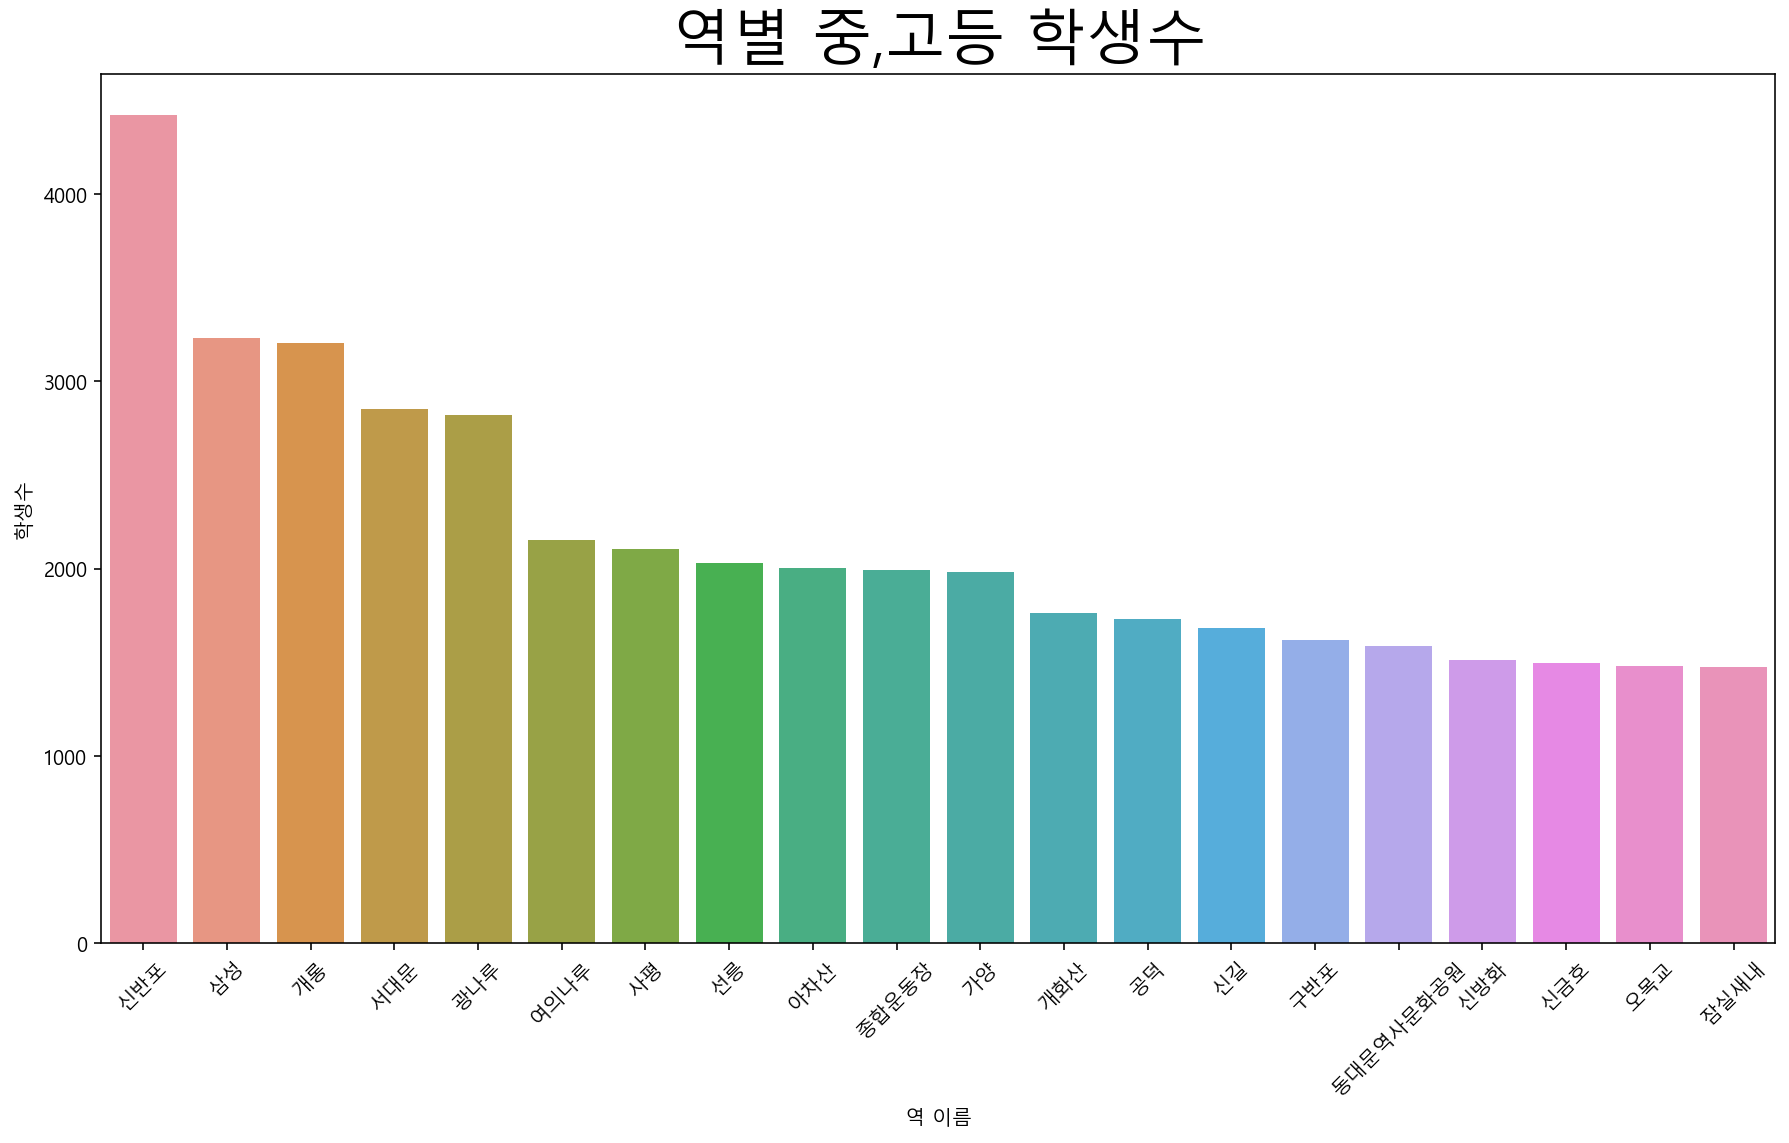

In [128]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 중,고등 학생수', fontsize=30)
sw_s = sns.barplot(data=STATN19_592_P_sort.head(20), x='STN_NM', y='Personnel')
plt.xlabel("역 이름")
plt.ylabel("학생수")

## 대학교 인원수

In [129]:
univer = pd.read_excel('data/as.xlsx')

In [130]:
univer_sort = univer.sort_values('Personnel', ascending = False)

In [131]:
c = univer_sort.reset_index().drop('index', axis = 1)

Text(0, 0.5, '학생수')

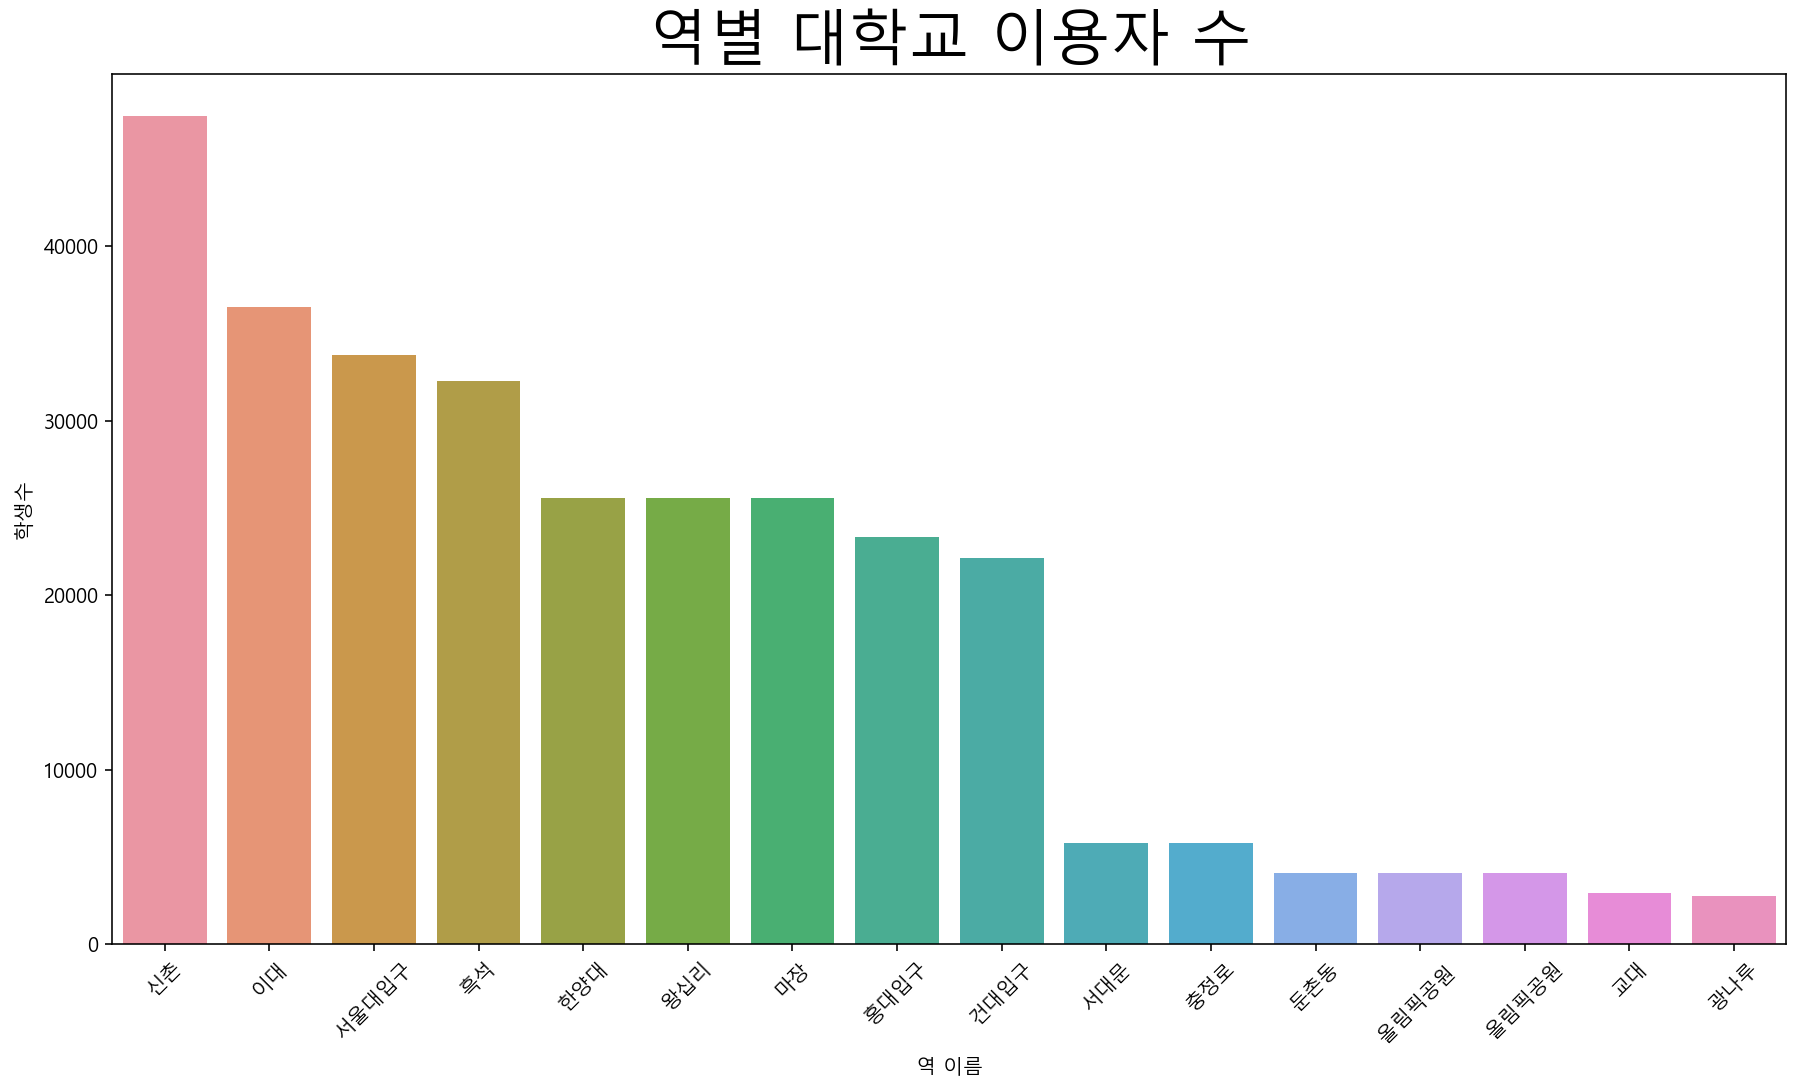

In [138]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 대학교 이용자 수', fontsize=30)
sw_s = sns.barplot(data=univer_sort.head(20), x='STN_NM', y='Personnel')
plt.xlabel("역 이름")
plt.ylabel("학생수")

In [139]:
c[['STN_NM','Personnel']]
ddf = np.array(c)

In [140]:
ddf

array([['신촌', 47463, 2, '신촌-47463'],
       ['이대', 36511, 2, '이대-36511'],
       ['서울대입구', 33726, 2, '서울대입구-33726'],
       ['흑석', 32254, 9, '흑석-32254'],
       ['한양대', 25579, 2, '한양대-25579'],
       ['왕십리', 25579, 5, '왕십리-25579'],
       ['마장', 25579, 5, '마장-25579'],
       ['홍대입구', 23309, 2, '홍대입구-23309'],
       ['건대입구', 22123, 2, '건대입구-22123'],
       ['서대문', 5820, 5, '서대문-5820'],
       ['충정로', 5820, 5, '충정로-5820'],
       ['둔촌동', 4075, 5, '둔촌동-4075'],
       ['올림픽공원 ', 4075, 5, '올림픽공원 -4075'],
       ['올림픽공원', 4075, 9, '올림픽공원-4075'],
       ['교대', 2922, 2, '교대-2922'],
       ['광나루', 2746, 5, '광나루-2746']], dtype=object)

In [141]:
pd.DataFrame(ddf)

,0,1,2,3
0,신촌,47463,2,신촌-47463
1,이대,36511,2,이대-36511
2,서울대입구,33726,2,서울대입구-33726
3,흑석,32254,9,흑석-32254
4,한양대,25579,2,한양대-25579
5,왕십리,25579,5,왕십리-25579
6,마장,25579,5,마장-25579
7,홍대입구,23309,2,홍대입구-23309
8,건대입구,22123,2,건대입구-22123
9,서대문,5820,5,서대문-5820


In [ ]:
발산 1
우장산 1
화곡 1
영등포 구청 1
영등포 시장 1
공덕 1
애오개 1
충정로 14
서대문 10
중로3가 5

In [142]:
cols = ['STN_NM','Personnel']
c['sums'] =c[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
c

,STN_NM,Personnel,BB_RT,sums
0,신촌,47463,2,신촌-47463
1,이대,36511,2,이대-36511
2,서울대입구,33726,2,서울대입구-33726
3,흑석,32254,9,흑석-32254
4,한양대,25579,2,한양대-25579
5,왕십리,25579,5,왕십리-25579
6,마장,25579,5,마장-25579
7,홍대입구,23309,2,홍대입구-23309
8,건대입구,22123,2,건대입구-22123
9,서대문,5820,5,서대문-5820


## 대학교

In [143]:
#고등학교
highschool = TBVIATR[TBVIATR['VIAT_NM'].str.contains('고등학교', na=False)].reset_index(drop=True)

In [144]:
highschool

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30104,200,AA0000000033,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,경일고등학교,NaN,NaN,NaN,204314.868103,549086.959229,NaN,209537.0,NaN,NaN,NaN
1,NaN,30104,200,AA0000000079,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,금천고등학교,NaN,NaN,NaN,191621.135071,538381.154907,NaN,21013.0,NaN,NaN,NaN
2,NaN,30104,200,AA0000000118,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,영락고등학교,NaN,NaN,NaN,195092.375122,541912.108887,NaN,232596.0,NaN,NaN,NaN
3,NaN,30104,200,AA0000000149,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,남강고등학교,NaN,NaN,NaN,193423.215820,541442.361389,NaN,230681.0,NaN,NaN,NaN
4,NaN,30104,200,AA0000000196,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,광신중고등학교,NaN,NaN,NaN,193363.620600,540656.437900,NaN,233454.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,30104,200,AA0000016557,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,한성중고등학교,NaN,NaN,NaN,195990.645081,551158.950073,NaN,222675.0,NaN,NaN,NaN
347,NaN,30104,300,AA0000016562,교육/보건,교육시설,고등교육기관,특수목적고등학교,NaN,서울디자인고등학교,NaN,NaN,NaN,195451.954590,549681.077271,NaN,224932.0,NaN,NaN,NaN
348,NaN,30104,200,AA0000016588,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,한세사이버보안고등학교,NaN,NaN,NaN,195763.433105,550258.221130,NaN,414857.0,NaN,NaN,NaN
349,NaN,30104,200,AA0000016596,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,서울여자고등학교,NaN,NaN,NaN,195444.180115,549836.739502,NaN,224906.0,NaN,NaN,NaN


In [145]:
#중학교
middleschool = TBVIATR[TBVIATR['VIAT_NM'].str.contains('중학교', na=False)].reset_index(drop=True)

In [146]:
middleschool

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30103,200,AA0000000029,교육/보건,교육시설,중등교육기관,공립중학교,NaN,장평중학교,NaN,NaN,NaN,206322.500000,551932.549194,NaN,106157.0,NaN,NaN,NaN
1,NaN,30103,200,AA0000000141,교육/보건,교육시설,중등교육기관,공립중학교,NaN,남강중학교,NaN,NaN,NaN,193333.565125,541302.846130,NaN,230681.0,NaN,NaN,NaN
2,NaN,30103,200,AA0000000185,교육/보건,교육시설,중등교육기관,공립중학교,NaN,난우중학교,NaN,NaN,NaN,193189.156616,540816.553284,NaN,233303.0,NaN,NaN,NaN
3,NaN,30103,200,AA0000000209,교육/보건,교육시설,중등교육기관,공립중학교,NaN,삼성중학교,NaN,NaN,NaN,194958.370117,540886.604309,NaN,227910.0,NaN,NaN,NaN
4,NaN,30103,200,AA0000000214,교육/보건,교육시설,중등교육기관,공립중학교,NaN,한울중학교,NaN,NaN,NaN,191786.241821,540338.241394,NaN,21137.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,NaN,30103,200,AA0000016223,교육/보건,교육시설,중등교육기관,공립중학교,NaN,성심여자중학교,NaN,NaN,NaN,196012.086121,548340.943604,NaN,208747.0,NaN,NaN,NaN
375,NaN,30103,200,AA0000016323,교육/보건,교육시설,중등교육기관,공립중학교,NaN,"선린인터넷고등학교,선린중학교",NaN,NaN,NaN,197158.005676,549176.648987,NaN,168588.0,NaN,NaN,NaN
376,NaN,30103,200,AA0000016510,교육/보건,교육시설,중등교육기관,공립중학교,NaN,아현중학교,NaN,NaN,NaN,196192.160278,550705.953430,NaN,225361.0,NaN,NaN,NaN
377,NaN,30103,200,AA0000016560,교육/보건,교육시설,중등교육기관,공립중학교,NaN,동도중학교,NaN,NaN,NaN,195299.186584,549659.592590,NaN,224932.0,NaN,NaN,NaN


In [147]:
school = highschool.append(middleschool)

In [148]:
school.reset_index()

,index,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,...,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,0,NaN,30104,200,AA0000000033,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,...,NaN,NaN,NaN,204314.868103,549086.959229,NaN,209537.0,NaN,NaN,NaN
1,1,NaN,30104,200,AA0000000079,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,...,NaN,NaN,NaN,191621.135071,538381.154907,NaN,21013.0,NaN,NaN,NaN
2,2,NaN,30104,200,AA0000000118,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,...,NaN,NaN,NaN,195092.375122,541912.108887,NaN,232596.0,NaN,NaN,NaN
3,3,NaN,30104,200,AA0000000149,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,...,NaN,NaN,NaN,193423.215820,541442.361389,NaN,230681.0,NaN,NaN,NaN
4,4,NaN,30104,200,AA0000000196,교육/보건,교육시설,고등교육기관,공립고등학교,NaN,...,NaN,NaN,NaN,193363.620600,540656.437900,NaN,233454.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,374,NaN,30103,200,AA0000016223,교육/보건,교육시설,중등교육기관,공립중학교,NaN,...,NaN,NaN,NaN,196012.086121,548340.943604,NaN,208747.0,NaN,NaN,NaN
726,375,NaN,30103,200,AA0000016323,교육/보건,교육시설,중등교육기관,공립중학교,NaN,...,NaN,NaN,NaN,197158.005676,549176.648987,NaN,168588.0,NaN,NaN,NaN
727,376,NaN,30103,200,AA0000016510,교육/보건,교육시설,중등교육기관,공립중학교,NaN,...,NaN,NaN,NaN,196192.160278,550705.953430,NaN,225361.0,NaN,NaN,NaN
728,377,NaN,30103,200,AA0000016560,교육/보건,교육시설,중등교육기관,공립중학교,NaN,...,NaN,NaN,NaN,195299.186584,549659.592590,NaN,224932.0,NaN,NaN,NaN


In [149]:
#대학교
college = TBVIATR[TBVIATR['SCLASDC'].str.contains('대학교', na=False)].reset_index(drop=True)

In [150]:
college = college.drop_duplicates(['VIAT_NM'])

In [151]:
college

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30105,204,AA0000000035,교육/보건,교육시설,대학교,종합대학,부속시설,서울시립대학교미래관,NaN,NaN,NaN,205004.402588,553907.842285,NaN,361921.0,NaN,NaN,NaN
1,NaN,30105,204,AA0000000039,교육/보건,교육시설,대학교,종합대학,부속시설,서울시립대학교국제학사,NaN,NaN,NaN,205526.797119,553880.587097,NaN,361921.0,NaN,NaN,NaN
2,NaN,30105,204,AA0000000041,교육/보건,교육시설,대학교,종합대학,부속시설,광운대학교광운대학교사택,NaN,NaN,NaN,204430.827698,557860.827515,NaN,217766.0,NaN,NaN,NaN
3,NaN,30105,204,AA0000000045,교육/보건,교육시설,대학교,종합대학,부속시설,고려대학교SK미래관,NaN,NaN,NaN,202836.742126,554254.569275,NaN,499604.0,NaN,NaN,NaN
5,NaN,30105,204,AA0000000058,교육/보건,교육시설,대학교,종합대학,부속시설,이화여자대학교연구협력관,NaN,NaN,NaN,195570.945801,552036.262329,NaN,220057.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,NaN,30105,204,AA0000016576,교육/보건,교육시설,대학교,종합대학,부속시설,카톨릭대학교교회음악대학원최양업홀,NaN,NaN,NaN,197148.581787,551033.717896,NaN,208261.0,NaN,NaN,NaN
1315,NaN,30105,204,AA0000016594,교육/보건,교육시설,대학교,종합대학,부속시설,숙명여자대학교서관,NaN,NaN,NaN,196785.675415,549581.749084,NaN,167824.0,NaN,NaN,NaN
1316,NaN,30105,204,AA0000016595,교육/보건,교육시설,대학교,종합대학,부속시설,숙명여자대학교대학원관,NaN,NaN,NaN,196805.138306,549654.058716,NaN,167824.0,NaN,NaN,NaN
1317,NaN,30105,201,AA0000016601,교육/보건,교육시설,대학교,종합대학,본교,경인교육대학교,NaN,NaN,NaN,192687.580078,537293.213379,NaN,NaN,NaN,NaN,NaN


In [152]:
college = college[["X_VALUE", "Y_VALUE"]]
college

,X_VALUE,Y_VALUE
0,205004.402588,553907.842285
1,205526.797119,553880.587097
2,204430.827698,557860.827515
3,202836.742126,554254.569275
5,195570.945801,552036.262329
...,...,...
1314,197148.581787,551033.717896
1315,196785.675415,549581.749084
1316,196805.138306,549654.058716
1317,192687.580078,537293.213379


In [153]:
coord = np.array(college)

In [154]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.05665867,  37.58471388],
       [127.06257289,  37.58446532],
       [127.05018871,  37.62033282],
       [127.03211827,  37.58784709],
       [126.9498666 ,  37.567854  ]])

In [155]:
college["위도"] = result_imt[:, 1]
college["경도"] = result_imt[:, 0]

In [156]:
college

,X_VALUE,Y_VALUE,위도,경도
0,205004.402588,553907.842285,37.584714,127.056659
1,205526.797119,553880.587097,37.584465,127.062573
2,204430.827698,557860.827515,37.620333,127.050189
3,202836.742126,554254.569275,37.587847,127.032118
5,195570.945801,552036.262329,37.567854,126.949867
...,...,...,...,...
1314,197148.581787,551033.717896,37.558827,126.967728
1315,196785.675415,549581.749084,37.545744,126.963627
1316,196805.138306,549654.058716,37.546396,126.963847
1317,192687.580078,537293.213379,37.435000,126.917376


In [157]:
c_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [158]:
for item in college.index:
    lat = college.loc[item, '위도']
    long = college.loc[item, '경도']
    g.Marker([lat, long],
             fill = True).add_to(c_map)
c_map

## 교통시설

In [159]:
TransportationFacilities = TBVIATR[TBVIATR['SCLASDC'].str.contains('항공', na=False)].reset_index(drop=True)

In [160]:
TransportationFacilities

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,50103,0,AA0000004403,시설물,교통시설,항공,미분류,NaN,한국도심공항수락터미널,NaN,NaN,NaN,204720.682922,564355.894409,NaN,365594.0,NaN,NaN,NaN
1,NaN,50103,0,AA0000009224,시설물,교통시설,항공,미분류,NaN,"김포국제공항국제선,물재생센터",NaN,NaN,NaN,182492.338074,552554.150085,NaN,413592.0,NaN,NaN,NaN
2,NaN,50103,0,AA0000009225,시설물,교통시설,항공,미분류,NaN,김포국제공항특수경비대실습교육장,NaN,NaN,NaN,182578.388672,552407.714111,NaN,413592.0,NaN,NaN,NaN
3,NaN,50103,0,AA0000009226,시설물,교통시설,항공,미분류,NaN,김포국제공항서울김포비지니스항공센터,NaN,NaN,NaN,182547.499573,552321.151978,NaN,413592.0,NaN,NaN,NaN
4,NaN,50103,0,AA0000009232,시설물,교통시설,항공,미분류,NaN,"양서빌딩서울우유농협개화산역지점,이스타항공(주)",NaN,NaN,NaN,183012.317200,552568.951904,NaN,16886.0,NaN,NaN,NaN
5,NaN,50103,0,AA0000009271,시설물,교통시설,항공,미분류,NaN,공항물류보관,NaN,NaN,NaN,181995.602295,553839.504211,NaN,NaN,NaN,NaN,NaN
6,NaN,50103,0,AA0000009287,시설물,교통시설,항공,미분류,NaN,김포공항,NaN,NaN,NaN,182606.282471,551039.680603,NaN,413592.0,NaN,NaN,NaN
7,NaN,50103,0,AA0000009327,시설물,교통시설,항공,미분류,NaN,대한항공협동조합,NaN,NaN,NaN,183109.412781,551285.099609,NaN,16552.0,NaN,NaN,NaN
8,NaN,50103,100,AA0000009766,시설물,교통시설,항공,국제공항,NaN,김포국제공항국제선,NaN,NaN,NaN,182399.643188,551842.802307,NaN,413592.0,NaN,NaN,NaN
9,NaN,50103,0,AA0000015541,시설물,교통시설,항공,미분류,NaN,"아시아나항공,아시아나경정비센터터",NaN,NaN,NaN,182047.982178,549477.136902,NaN,413592.0,NaN,NaN,NaN


In [161]:
TransportationFacilities['SCLASDC'].value_counts()

항공    21
Name: SCLASDC, dtype: int64

In [162]:
TransportationFacilities = TransportationFacilities[["X_VALUE", "Y_VALUE"]]
TransportationFacilities

,X_VALUE,Y_VALUE
0,204720.682922,564355.894409
1,182492.338074,552554.150085
2,182578.388672,552407.714111
3,182547.499573,552321.151978
4,183012.317200,552568.951904
5,181995.602295,553839.504211
6,182606.282471,551039.680603
7,183109.412781,551285.099609
8,182399.643188,551842.802307
9,182047.982178,549477.136902


In [163]:
coord = np.array(TransportationFacilities)

In [164]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.05351392,  37.67885082],
       [126.8018152 ,  37.57236443],
       [126.80279276,  37.57104669],
       [126.80244517,  37.57026619],
       [126.80770093,  37.57250753]])

In [165]:
TransportationFacilities["위도"] = result_imt[:, 1]
TransportationFacilities["경도"] = result_imt[:, 0]

In [166]:
TransportationFacilities

,X_VALUE,Y_VALUE,위도,경도
0,204720.682922,564355.894409,37.678851,127.053514
1,182492.338074,552554.150085,37.572364,126.801815
2,182578.388672,552407.714111,37.571047,126.802793
3,182547.499573,552321.151978,37.570266,126.802445
4,183012.317200,552568.951904,37.572508,126.807701
5,181995.602295,553839.504211,37.583936,126.796161
6,182606.282471,551039.680603,37.558721,126.803141
7,183109.412781,551285.099609,37.560942,126.808830
8,182399.643188,551842.802307,37.565953,126.800783
9,182047.982178,549477.136902,37.544632,126.796860


In [167]:
t_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [168]:
for item in TransportationFacilities.index:
    lat = TransportationFacilities.loc[item, '위도']
    long = TransportationFacilities.loc[item, '경도']
    g.Marker([lat, long],
             fill = True).add_to(t_map)
t_map

## 숙박

## 레저/관광/예술

## 영화관

# 1. 시각화

In [22]:
subway21

,YEAR,MONTH,DAY,HOUR,HALF_HOUR,LINE_NM,STATION_NM,GETON_CNT,GETOFF_CNT
0,2021,1,1,4,30,1호선,서울역,2,0
1,2021,1,1,4,30,1호선,종각,1,0
2,2021,1,1,4,30,1호선,동대문,2,0
3,2021,1,1,4,30,1호선,신설동,5,0
4,2021,1,1,4,30,1호선,제기동,1,0
...,...,...,...,...,...,...,...,...,...
4708825,2021,12,31,23,30,우이신설선,북한산보국문,1,23
4708826,2021,12,31,23,30,우이신설선,정릉,2,28
4708827,2021,12,31,23,30,우이신설선,성신여대입구(돈암),0,1
4708828,2021,12,31,23,30,우이신설선,보문,6,10


In [13]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## subway데이터셋: 서울시 30분 단위 이용 통계(20년)

### 호선별 승하차 총 인원 수

In [24]:
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']

In [25]:
subway21_total = subway21[['LINE_NM','GET_TOTAL']].groupby('LINE_NM', as_index = False).sum().sort_values('GET_TOTAL')
subway21_total

,LINE_NM,GET_TOTAL
10,우이신설선,23084704
9,9호선2~3단계,43636427
0,1호선,69914047
7,8호선,86694515
8,9호선,122718068
5,6호선,154927011
3,4호선,223497636
2,3호선,234372532
4,5호선,309580895
6,7호선,318074271


Text(0.5, 1.0, '21년 호선별 승하차인원 합계')

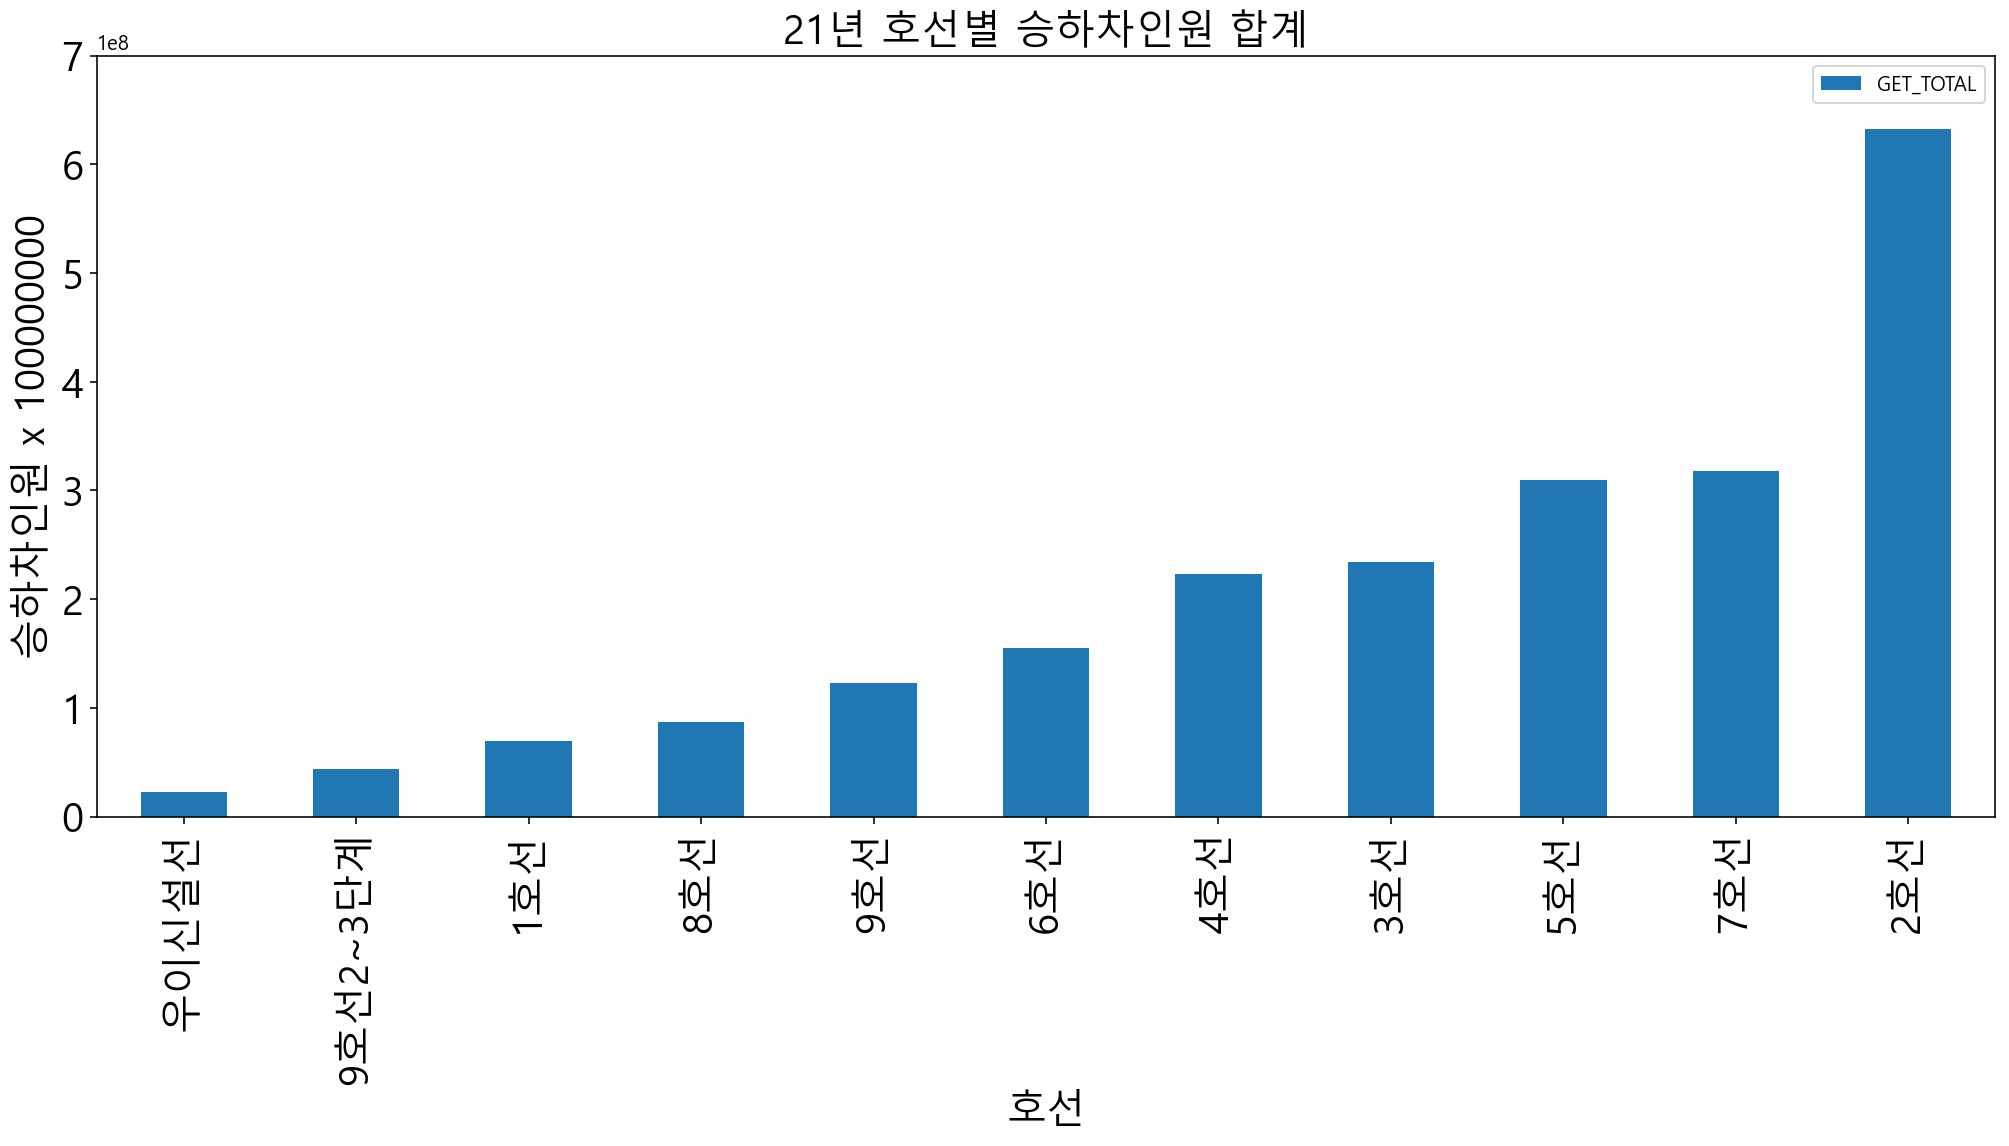

In [26]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize = (12, 12))
subway21_total.plot.bar(x = 'LINE_NM', y = 'GET_TOTAL', fontsize = 20, figsize = (17, 7))
plt.xlabel('호선', fontsize = 20)
plt.ylabel('승하차인원 x 100000000', fontsize = 20)
plt.ylim([0, 700000000])
plt.title("21년 호선별 승하차인원 합계", fontsize = 20)

## 역별 승하차인원 시각화

In [27]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False).head(15)

,,GET_TOTAL
STATION_NM,LINE_NM,
강남,2호선,39321791
잠실(송파구청),2호선,34859312
신림,2호선,31166581
구로디지털단지,2호선,27919882
홍대입구,2호선,24607291
서울대입구(관악구청),2호선,23663886
삼성(무역센터),2호선,22896033
선릉,2호선,22516073
역삼,2호선,22192869


In [28]:
subway21 = subway21.pivot_table(index='STATION_NM', values=['GETON_CNT','GETOFF_CNT'], aggfunc='sum').reset_index()
subway21
subway21_sort = subway21.sort_values(by='GETOFF_CNT', ascending=False)
subway21_sort

,STATION_NM,GETOFF_CNT,GETON_CNT
234,잠실(송파구청),21310722,21089196
5,강남,19660167,19661624
20,고속터미널,18111401,18015888
177,신림,15334779,15831802
124,사당,14685789,14800449
...,...,...,...
239,장암,267825,602385
78,둔촌오륜,267690,293802
49,남태령,235189,277492
48,남위례,34830,30744


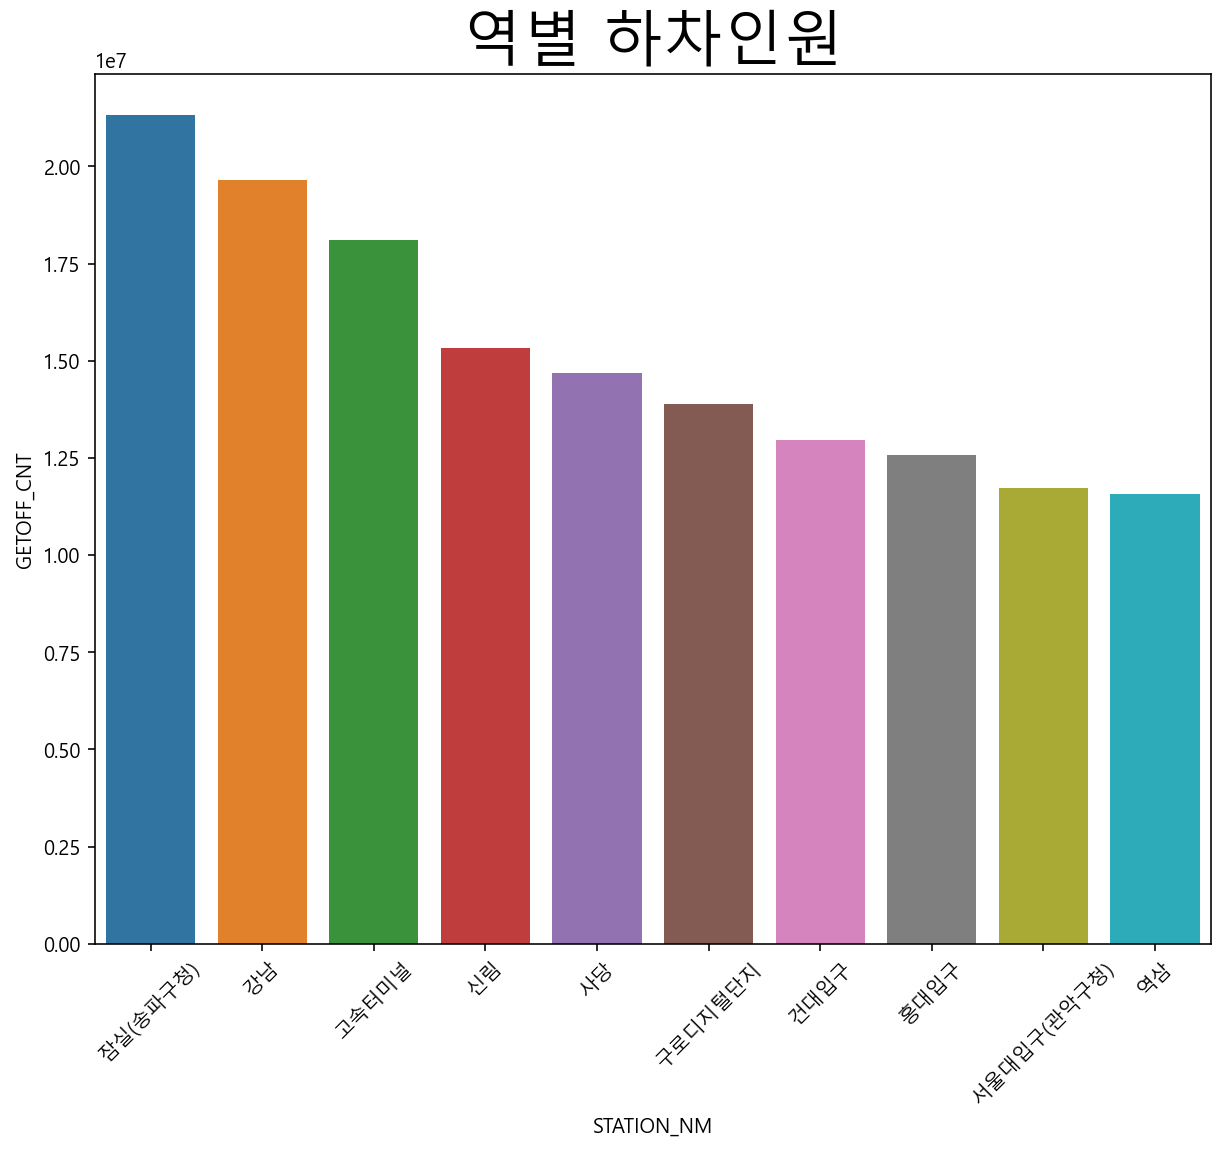

In [29]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 하차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETOFF_CNT')

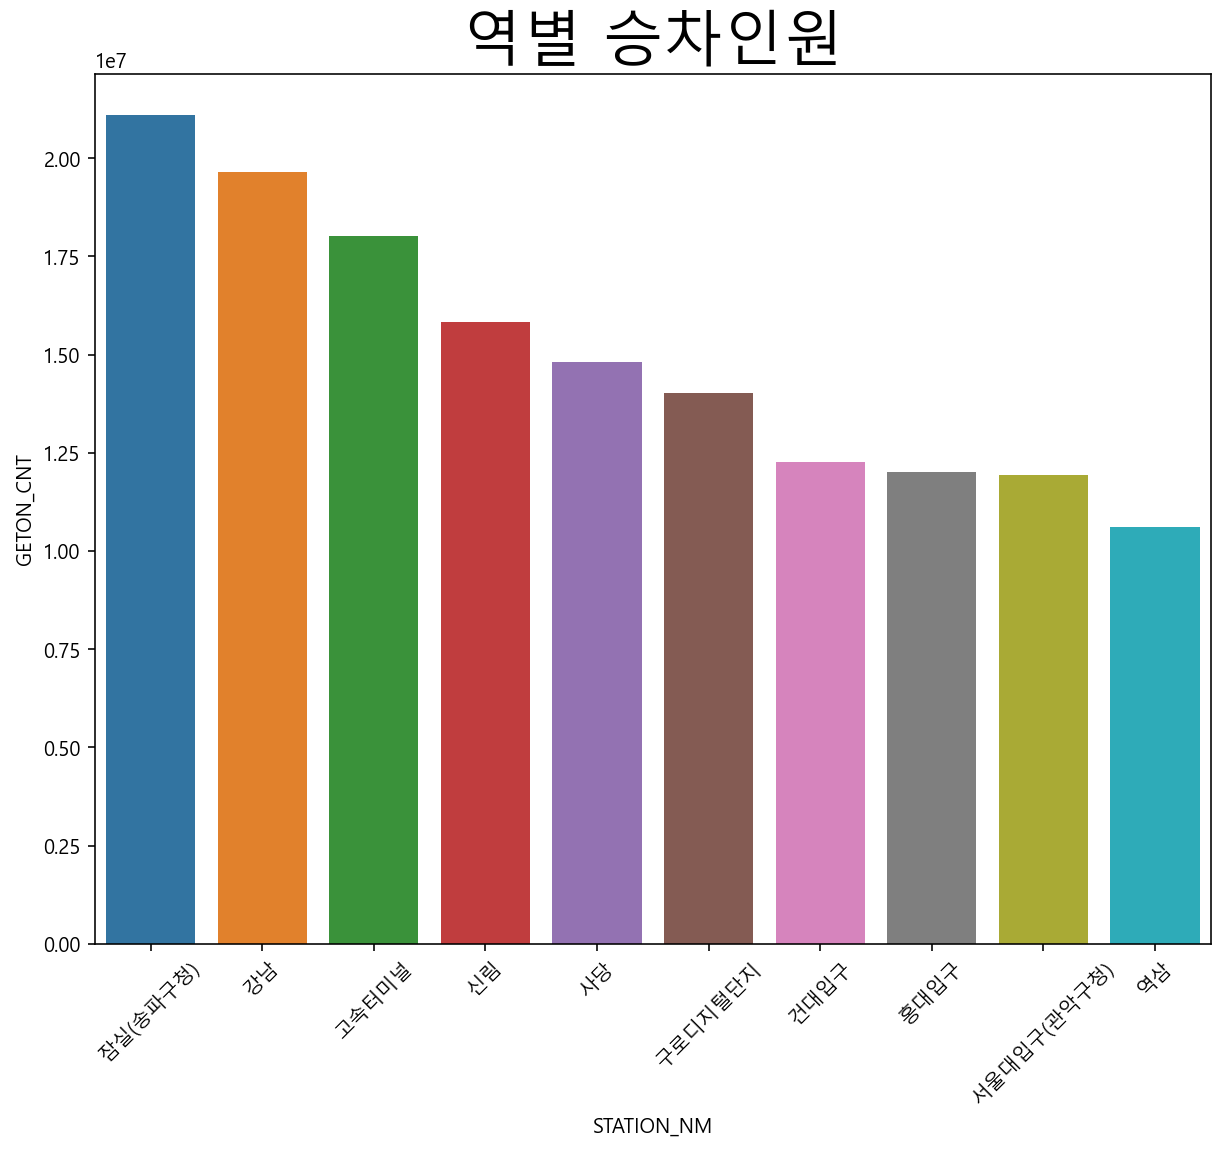

In [30]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 승차인원', fontsize=30)
sw_s = sns.barplot(data=subway21_sort.head(10), x='STATION_NM', y='GETON_CNT')

# 강남과 잠실의 순서가 승차인원과 하차인원에서 다르다.

# STATN19: 수도권 지하철 공간데이터(19년)

* 지하철의 좌표값을 이용해 지도에 마커를 찍을 예정

In [31]:
# 필요한 컬럼만 뽑기

STATN19 = STATN19[['STN_NM','BB_RT', 'TM_X', 'TM_Y']]
STATN19

,STN_NM,BB_RT,TM_X,TM_Y
0,미아사거리,4,202653.112000,557083.212000
1,길음,4,202211.999200,555986.072800
2,성신여대입구,4,201448.475600,554789.239200
3,한성대입구,4,200549.379300,554326.801300
4,혜화,4,200162.857800,553647.385000
...,...,...,...,...
675,송산,의정부,207682.620246,570843.123742
676,탑석,의정부,207819.193238,570432.583073
677,성신여대입구,우이,201448.649054,554784.394200
678,보문,우이,201711.822463,553970.009115


In [32]:
# 5호선만 뽑아보리기

STATN19_5 = STATN19[STATN19["BB_RT"].str.contains('5')].reset_index(drop = True)
STATN19_5.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.6294,553121.1899
1,개화산,5,182879.1880,552562.2672
2,김포공항,5,182425.2178,551457.3293
3,송정,5,183389.1858,551316.6236
4,마곡,5,184579.3985,551203.2401


In [33]:
# 9호선만 뽑기

STATN19_9 = STATN19[STATN19["BB_RT"].str.contains('9')].reset_index(drop = True)
STATN19_9.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,개화,9,182172.4419,553252.8131
1,김포공항,9,182425.2178,551457.3293
2,공항시장,9,183275.3502,551598.9555
3,신방화,9,183799.4110,552020.2947
4,마곡나루,9,184938.5433,551996.3983


In [34]:
# 2호선만 뽑기

STATN19_2 = STATN19[STATN19["BB_RT"].str.contains('2')].reset_index(drop = True)[:51]
STATN19_2.head()

,STN_NM,BB_RT,TM_X,TM_Y
0,시청,2,197977.7552,551692.4450
1,을지로입구,2,198464.5269,551836.1661
2,을지로3가,2,199285.3567,551867.2392
3,을지로4가,2,199830.3068,551938.9009
4,동대문역사문화공원,2,200697.5168,551738.8380


In [35]:
# 인덱스 순서 같게 하여 세로로 합치기

A = STATN19_5.append(STATN19_9).reset_index(drop = True)
STATN19_592 = A.append(STATN19_2).reset_index(drop = True)

In [36]:
# 잘 합쳐진건지 확인

STATN19_592

,STN_NM,BB_RT,TM_X,TM_Y
0,방화,5,183460.629400,553121.189900
1,개화산,5,182879.188000,552562.267200
2,김포공항,5,182425.217800,551457.329300
3,송정,5,183389.185800,551316.623600
4,마곡,5,184579.398500,551203.240100
...,...,...,...,...
127,도림천,2,189636.922600,546102.029000
128,양천구청,2,188138.364800,545894.398100
129,신정네거리,2,186998.713800,546747.951900
130,용두,2,203364.482800,552726.071500


In [37]:
# !pip install pyproj

In [38]:
# !pip install folium

In [39]:
# !pip install haversine

In [40]:
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [41]:
# TM좌표계를 위도/경도 좌표로 변환하기 위해 따로 뽑기

STATN19_xy = STATN19_592[["TM_X","TM_Y"]]

In [42]:
STATN19_xy

,TM_X,TM_Y
0,183460.629400,553121.189900
1,182879.188000,552562.267200
2,182425.217800,551457.329300
3,183389.185800,551316.623600
4,184579.398500,551203.240100
...,...,...
127,189636.922600,546102.029000
128,188138.364800,545894.398100
129,186998.713800,546747.951900
130,203364.482800,552726.071500


In [43]:
# TM -> 위도/경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [44]:
coord = np.array(STATN19_xy)
coord.shape

(132, 2)

In [45]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_sub = project_array(coord, p1_type, p2_type)
result_sub[:5]

array([[126.81276331,  37.5774913 ],
       [126.80619409,  37.57244484],
       [126.80108169,  37.56248091],
       [126.81199539,  37.56123104],
       [126.82546879,  37.56023014]])

In [46]:
STATN19_592["위도"] = result_sub[:, 1]

In [47]:
STATN19_592["경도"] = result_sub[:, 0]

In [48]:
STATN19_592

,STN_NM,BB_RT,TM_X,TM_Y,위도,경도
0,방화,5,183460.629400,553121.189900,37.577491,126.812763
1,개화산,5,182879.188000,552562.267200,37.572445,126.806194
2,김포공항,5,182425.217800,551457.329300,37.562481,126.801082
3,송정,5,183389.185800,551316.623600,37.561231,126.811995
4,마곡,5,184579.398500,551203.240100,37.560230,126.825469
...,...,...,...,...,...,...
127,도림천,2,189636.922600,546102.029000,37.514339,126.882782
128,양천구청,2,188138.364800,545894.398100,37.512450,126.865835
129,신정네거리,2,186998.713800,546747.951900,37.520125,126.852930
130,용두,2,203364.482800,552726.071500,37.574074,127.038086


In [49]:
STATN19_592 = STATN19_592.drop(['TM_X', 'TM_Y'], axis = 1)

In [50]:
STATN19_592

,STN_NM,BB_RT,위도,경도
0,방화,5,37.577491,126.812763
1,개화산,5,37.572445,126.806194
2,김포공항,5,37.562481,126.801082
3,송정,5,37.561231,126.811995
4,마곡,5,37.560230,126.825469
...,...,...,...,...
127,도림천,2,37.514339,126.882782
128,양천구청,2,37.512450,126.865835
129,신정네거리,2,37.520125,126.852930
130,용두,2,37.574074,127.038086


In [51]:
g_map = g.Map(location =[37.613333,127.030049],zoom_start = 12)

In [52]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for item in STATN19_592.index:
    lat = STATN19_592.loc[item, '위도']
    long = STATN19_592.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(g_map)
g_map

## TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)

In [53]:
TBVIATR.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,NaN,30102,200,AA0000000001,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,"강덕초교,고덕그라시움버스정류장쉘터",NaN,NaN,NaN,214388.672913,551205.841919,NaN,156656.0,NaN,NaN,NaN
1,NaN,70301,302,AA0000000002,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214555.910095,550962.356812,NaN,156617.0,NaN,NaN,NaN
2,NaN,30102,200,AA0000000003,교육/보건,교육시설,초등교육기관,공립초등학교,NaN,서울강덕초등학교,NaN,NaN,NaN,214224.118713,550979.324829,NaN,156670.0,NaN,NaN,NaN
3,NaN,30101,100,AA0000000004,교육/보건,교육시설,유아교육기관,어린이집,NaN,은빛어린이집,NaN,NaN,NaN,214171.512024,550841.469116,NaN,155226.0,NaN,NaN,NaN
4,NaN,70301,302,AA0000000005,산업,서비스산업,종합상품판매업,대형상가,일반종합상가,고덕그라시움상가,NaN,NaN,NaN,214481.776611,550819.438110,NaN,155064.0,NaN,NaN,NaN


In [54]:
# 필요한 컬럼만 가져오기

TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "X_VALUE", "Y_VALUE"]]
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [55]:
# TM -> 위도/경도 좌표계 변환하기 위해 좌표만 끄집어냄

TBVIATR_xy = TBVIATR[["X_VALUE", "Y_VALUE"]]
TBVIATR_xy

,X_VALUE,Y_VALUE
0,214388.672913,551205.841919
1,214555.910095,550962.356812
2,214224.118713,550979.324829
3,214171.512024,550841.469116
4,214481.776611,550819.438110
...,...,...
19456,191061.555317,544289.967983
19457,191005.451446,542730.985067
19458,191354.443045,541322.297120
19459,188687.329239,547251.976724


In [56]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [57]:
coord = np.array(TBVIATR_xy)
coord.shape
#coord[:5]

(19461, 2)

In [58]:
coord.shape

(19461, 2)

In [59]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.16285188,  37.56027027],
       [127.16473985,  37.55807386],
       [127.16098506,  37.55823192],
       [127.16038702,  37.55699066],
       [127.16389801,  37.55678734]])

In [60]:
TBVIATR

,LCLASDC,MLSFCDC,X_VALUE,Y_VALUE
0,교육/보건,교육시설,214388.672913,551205.841919
1,산업,서비스산업,214555.910095,550962.356812
2,교육/보건,교육시설,214224.118713,550979.324829
3,교육/보건,교육시설,214171.512024,550841.469116
4,산업,서비스산업,214481.776611,550819.438110
...,...,...,...,...
19456,교육/보건,교육시설,191061.555317,544289.967983
19457,교육/보건,교육시설,191005.451446,542730.985067
19458,산업,서비스산업,191354.443045,541322.297120
19459,교육/보건,보건시설,188687.329239,547251.976724


In [61]:
TBVIATR["위도"] = result_imt[:, 1]
TBVIATR["경도"] = result_imt[:, 0]

In [62]:
TBVIATR = TBVIATR[["LCLASDC", "MLSFCDC", "위도", "경도"]]
TBVIATR

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898
...,...,...,...,...
19456,교육/보건,교육시설,37.498027,126.898918
19457,교육/보건,교육시설,37.483980,126.898303
19458,산업,서비스산업,37.471291,126.902265
19459,교육/보건,보건시설,37.524689,126.872023


In [63]:
# 역 이름과 호선 name으로 넣는 과정, 
# 역 이름과 호선별로 각 시설들이 몇개 씩 있는지 확인하기 위해 name을 설정하였다.
# 이 아래는 몇개씩 있는지 확인하는 과정이다.

STATN19_592_name = STATN19_592[['STN_NM', 'BB_RT']]
name = np.array(STATN19_592_name)
name[:5]

array([['방화', '5'],
       ['개화산', '5'],
       ['김포공항', '5'],
       ['송정', '5'],
       ['마곡', '5']], dtype=object)

In [64]:
# 시설의 개수 확인하기

TBVIATR.LCLASDC.value_counts()

교육/보건       13049
산업           2660
숙박/음식        2474
행정            607
레저/관광/예술      476
공공/환경         109
시설물            86
Name: LCLASDC, dtype: int64

In [65]:
result_sub = np.array(STATN19_592[['위도', '경도']])
result_imt = np.array(TBVIATR[['위도', '경도']])

In [66]:
TBVIATR.head()

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,산업,서비스산업,37.558074,127.164740
2,교육/보건,교육시설,37.558232,127.160985
3,교육/보건,교육시설,37.556991,127.160387
4,산업,서비스산업,37.556787,127.163898


#### 교육/보건

In [98]:
from haversine import haversine, Unit

In [68]:
TBVIATR_edu_1 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_1 = TBVIATR_edu_1.loc["교육/보건"].reset_index()
TBVIATR_edu_1["LCLASDC"].head()

0    교육/보건
1    교육/보건
2    교육/보건
3    교육/보건
4    교육/보건
Name: LCLASDC, dtype: object

In [69]:
TBVIATR_edu_1

,LCLASDC,MLSFCDC,위도,경도
0,교육/보건,교육시설,37.560270,127.162852
1,교육/보건,교육시설,37.558232,127.160985
2,교육/보건,교육시설,37.556991,127.160387
3,교육/보건,교육시설,37.498516,127.102067
4,교육/보건,교육시설,37.497201,127.102680
...,...,...,...,...
13044,교육/보건,보건시설,37.450467,126.909474
13045,교육/보건,교육시설,37.498027,126.898918
13046,교육/보건,교육시설,37.483980,126.898303
13047,교육/보건,보건시설,37.524689,126.872023


In [70]:
TBVIATR_edu_result_1 = np.array(TBVIATR_edu_1[['위도', '경도']])
TBVIATR_edu_result_1

array([[ 37.56027027, 127.16285188],
       [ 37.55823192, 127.16098506],
       [ 37.55699066, 127.16038702],
       ...,
       [ 37.48398012, 126.89830273],
       [ 37.52468894, 126.87202331],
       [ 37.52722912, 127.03309306]])

In [175]:
# 역별로 교육/보건 시설의 개수

print("교육/보건\n")
sb3 = []
i = 0
for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb3.append(count)

교육/보건



NameError: name 'result_sub' is not defined

In [72]:
# 교육/보건시설의 역에서 평균 거리

print("교육/보건\n")

dist_mean_1 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_1:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_1.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_1.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_1

교육/보건



[0.55,
 0.63,
 0.81,
 0.5,
 0.74,
 0.59,
 0.65,
 0.57,
 0.63,
 0.64,
 0.65,
 0.51,
 0.74,
 0.68,
 0.53,
 0.71,
 0.61,
 0.7,
 0.66,
 0.67,
 0.64,
 0.68,
 0.55,
 0.7,
 0.71,
 0.73,
 0.64,
 0.71,
 0.7,
 0.75,
 0.66,
 0.67,
 0.67,
 0.57,
 0.56,
 0.65,
 0.68,
 0.59,
 0.65,
 0.63,
 0.65,
 0.65,
 0.69,
 0.68,
 0.72,
 0.71,
 0.65,
 0.61,
 0.57,
 0.69,
 0.65,
 0.91,
 0.81,
 0.55,
 0.68,
 0.81,
 0.58,
 0.57,
 0.7,
 0.59,
 0.58,
 0.76,
 0.52,
 0.62,
 0.72,
 0.61,
 0.72,
 0.61,
 0.74,
 0.52,
 0.92,
 0.79,
 0.58,
 0.74,
 0.78,
 0.63,
 0.67,
 0.67,
 0.64,
 0.64,
 0.72,
 0.66,
 0.66,
 0.69,
 0.71,
 0.73,
 0.61,
 0.57,
 0.65,
 0.54,
 0.67,
 0.65,
 0.64,
 0.65,
 0.74,
 0.57,
 0.8,
 0.58,
 0.72,
 0.66,
 0.74,
 0.63,
 0.68,
 0.51,
 0.69,
 0.61,
 0.62,
 0.6,
 0.61,
 0.55,
 0.57,
 0.6,
 0.71,
 0.66,
 0.74,
 0.68,
 0.68,
 0.62,
 0.64,
 0.62,
 0.68,
 0.71,
 0.67,
 0.68,
 0.64,
 0.72,
 0.62,
 0.71,
 0.71,
 0.61,
 0.71,
 0.63]

### 산업

In [73]:
TBVIATR_edu_2 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_2 = TBVIATR_edu_2.loc["산업"].reset_index()
TBVIATR_edu_2["LCLASDC"].head()

0    산업
1    산업
2    산업
3    산업
4    산업
Name: LCLASDC, dtype: object

In [74]:
TBVIATR_edu_result_2 = np.array(TBVIATR_edu_2[['위도', '경도']])
TBVIATR_edu_result_2

array([[ 37.55807386, 127.16473985],
       [ 37.55678734, 127.16389801],
       [ 37.56001763, 127.16372403],
       ...,
       [ 37.47204399, 126.89404121],
       [ 37.47217972, 126.89453114],
       [ 37.47129106, 126.90226514]])

In [75]:
# 역별로 산업 시설의 개수

print("산업\n")
sb4 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb4.append(count)

산업

['방화' '5'] -> 7 개
['개화산' '5'] -> 9 개
['김포공항' '5'] -> 9 개
['송정' '5'] -> 15 개
['마곡' '5'] -> 12 개
['발산' '5'] -> 20 개
['우장산' '5'] -> 17 개
['화곡' '5'] -> 15 개
['까치산' '5'] -> 12 개
['신정' '5'] -> 19 개
['목동' '5'] -> 25 개
['오목교' '5'] -> 23 개
['양평' '5'] -> 21 개
['영등포구청' '5'] -> 27 개
['영등포시장' '5'] -> 43 개
['신길' '5'] -> 34 개
['여의도' '5'] -> 56 개
['여의나루' '5'] -> 31 개
['마포' '5'] -> 32 개
['공덕' '5'] -> 33 개
['애오개' '5'] -> 21 개
['충정로' '5'] -> 24 개
['서대문' '5'] -> 32 개
['종로3가' '5'] -> 86 개
['을지로4가' '5'] -> 101 개
['동대문역사문화공원' '5'] -> 63 개
['청구' '5'] -> 35 개
['신금호' '5'] -> 21 개
['행당' '5'] -> 14 개
['마장' '5'] -> 27 개
['답십리' '5'] -> 16 개
['장한평' '5'] -> 16 개
['군자' '5'] -> 17 개
['아차산' '5'] -> 16 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 24 개
['강동' '5'] -> 30 개
['길동' '5'] -> 20 개
['굽은다리' '5'] -> 24 개
['명일' '5'] -> 22 개
['고덕' '5'] -> 17 개
['상일동' '5'] -> 13 개
['둔촌동' '5'] -> 22 개
['올림픽공원' '5'] -> 9 개
['방이' '5'] -> 20 개
['오금' '5'] -> 19 개
['개롱' '5'] -> 12 개
['거여' '5'] -> 16 개
['마천' '5'] -> 15 개
['광화문' '5'] -> 51 개
['왕십리' 

In [76]:
# 산업시설의 역에서 평균 거리

print("산업\n")

dist_mean_2 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_2:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_2.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_2.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_2

산업



[0.56,
 0.55,
 0.86,
 0.6,
 0.79,
 0.5,
 0.71,
 0.61,
 0.66,
 0.63,
 0.7,
 0.52,
 0.76,
 0.59,
 0.57,
 0.8,
 0.68,
 0.73,
 0.52,
 0.6,
 0.72,
 0.72,
 0.64,
 0.46,
 0.64,
 0.67,
 0.69,
 0.67,
 0.71,
 0.69,
 0.56,
 0.58,
 0.57,
 0.66,
 0.61,
 0.54,
 0.69,
 0.67,
 0.57,
 0.58,
 0.66,
 0.62,
 0.58,
 0.75,
 0.6,
 0.65,
 0.7,
 0.63,
 0.56,
 0.67,
 0.66,
 0.73,
 0.86,
 0.45,
 0.74,
 0.89,
 0.65,
 0.56,
 0.61,
 0.51,
 0.6,
 0.84,
 0.45,
 0.57,
 0.57,
 0.68,
 0.66,
 0.59,
 0.48,
 0.43,
 0.74,
 0.57,
 0.66,
 0.56,
 0.8,
 0.75,
 0.72,
 0.69,
 0.73,
 0.59,
 0.83,
 0.6,
 0.63,
 0.65,
 0.64,
 0.67,
 0.58,
 0.78,
 0.66,
 0.63,
 0.56,
 0.61,
 0.6,
 0.65,
 0.6,
 0.5,
 0.61,
 0.64,
 0.83,
 0.6,
 0.68,
 0.59,
 0.65,
 0.64,
 0.62,
 0.61,
 0.5,
 0.52,
 0.65,
 0.54,
 0.58,
 0.61,
 0.73,
 0.65,
 0.64,
 0.7,
 0.59,
 0.57,
 0.6,
 0.7,
 0.5,
 0.67,
 0.65,
 0.72,
 0.78,
 0.62,
 0.58,
 0.74,
 0.66,
 0.48,
 0.63,
 0.66]

### 숙박/음식

In [77]:
TBVIATR_edu_3 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_3 = TBVIATR_edu_3.loc["숙박/음식"].reset_index()
TBVIATR_edu_3["LCLASDC"].head()

0    숙박/음식
1    숙박/음식
2    숙박/음식
3    숙박/음식
4    숙박/음식
Name: LCLASDC, dtype: object

In [78]:
TBVIATR_edu_result_3 = np.array(TBVIATR_edu_3[['위도', '경도']])
TBVIATR_edu_result_3

array([[ 37.53804211, 127.12821378],
       [ 37.53833182, 127.12895978],
       [ 37.53820195, 127.12814859],
       ...,
       [ 37.50817955, 126.96237648],
       [ 37.50772692, 126.96191758],
       [ 37.47826728, 126.89486763]])

In [79]:
# 역별로 숙박/음식 시설의 개수

print("숙박/음식\n")
sb5 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb5.append(count)

숙박/음식

['방화' '5'] -> 3 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 7 개
['송정' '5'] -> 8 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 23 개
['화곡' '5'] -> 32 개
['까치산' '5'] -> 49 개
['신정' '5'] -> 19 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 1 개
['양평' '5'] -> 14 개
['영등포구청' '5'] -> 39 개
['영등포시장' '5'] -> 94 개
['신길' '5'] -> 83 개
['여의도' '5'] -> 13 개
['여의나루' '5'] -> 3 개
['마포' '5'] -> 6 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 17 개
['충정로' '5'] -> 28 개
['서대문' '5'] -> 22 개
['종로3가' '5'] -> 101 개
['을지로4가' '5'] -> 122 개
['동대문역사문화공원' '5'] -> 102 개
['청구' '5'] -> 62 개
['신금호' '5'] -> 14 개
['행당' '5'] -> 35 개
['마장' '5'] -> 41 개
['답십리' '5'] -> 20 개
['장한평' '5'] -> 24 개
['군자' '5'] -> 18 개
['아차산' '5'] -> 11 개
['광나루' '5'] -> 4 개
['천호' '5'] -> 53 개
['강동' '5'] -> 82 개
['길동' '5'] -> 41 개
['굽은다리' '5'] -> 18 개
['명일' '5'] -> 4 개
['고덕' '5'] -> 2 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 20 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 2 개
['거여' '5'] -> 6 개
['마천' '5'] -> 6 개
['광화문' '5'] -> 34 개
['왕십리' '5'] -> 40 

In [80]:
# 숙박/음식시설의 역에서 평균 거리

print("숙박/음식\n")

dist_mean_3 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_3:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_3.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_3.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_3

숙박/음식



[0.51,
 0.46,
 0.72,
 0.28,
 0.93,
 0.27,
 0.91,
 0.73,
 0.57,
 0.78,
 0.74,
 0.18,
 0.59,
 0.59,
 0.54,
 0.72,
 0.84,
 0.71,
 0.46,
 0.47,
 0.67,
 0.69,
 0.71,
 0.51,
 0.74,
 0.63,
 0.73,
 0.73,
 0.81,
 0.74,
 0.57,
 0.59,
 0.56,
 0.53,
 0.51,
 0.45,
 0.62,
 0.39,
 0.89,
 0.59,
 0.62,
 0,
 0.79,
 0,
 0,
 0,
 0.96,
 0.77,
 0.35,
 0.75,
 0.39,
 0,
 0.72,
 0.33,
 0.9,
 0.25,
 0.9,
 0.89,
 0.66,
 0.74,
 0.33,
 0.73,
 0.49,
 0.49,
 0.64,
 0.84,
 0.81,
 0.5,
 0.76,
 0.36,
 0,
 0.75,
 0.59,
 0.52,
 0.73,
 0.58,
 0.72,
 0.78,
 0.75,
 0.75,
 0.76,
 0.71,
 0.75,
 0.66,
 0.74,
 0.63,
 0.62,
 0.62,
 0.39,
 0.75,
 0.47,
 0.74,
 0.73,
 0.66,
 0.67,
 0.8,
 0.74,
 0.42,
 0.76,
 0.76,
 0.63,
 0.55,
 0.66,
 0.68,
 0.7,
 0.52,
 0.34,
 0.97,
 0.29,
 0.86,
 0.23,
 0.68,
 0.63,
 0.84,
 0.73,
 0.66,
 0.59,
 0.49,
 0.59,
 0.64,
 0.38,
 0.73,
 0.45,
 0.69,
 0.77,
 0.73,
 0.53,
 0.74,
 0,
 0.47,
 0.7,
 0.57]

### 행정

In [81]:
TBVIATR_edu_4 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_4 = TBVIATR_edu_4.loc["행정"].reset_index()
TBVIATR_edu_4["LCLASDC"].head()

0    행정
1    행정
2    행정
3    행정
4    행정
Name: LCLASDC, dtype: object

In [82]:
TBVIATR_edu_result_4 = np.array(TBVIATR_edu_4[['위도', '경도']])
TBVIATR_edu_result_4

array([[ 37.49654608, 127.10993326],
       [ 37.59293371, 127.06575311],
       [ 37.58353155, 126.89368024],
       ...,
       [ 37.58693399, 126.98607813],
       [ 37.64067367, 127.01406449],
       [ 37.60264741, 126.92985768]])

In [83]:
# 역별로 행정 시설의 개수

print("행정\n")
sb6 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb6.append(count)

행정

['방화' '5'] -> 2 개
['개화산' '5'] -> 3 개
['김포공항' '5'] -> 2 개
['송정' '5'] -> 2 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 2 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 4 개
['까치산' '5'] -> 6 개
['신정' '5'] -> 3 개
['목동' '5'] -> 8 개
['오목교' '5'] -> 2 개
['양평' '5'] -> 6 개
['영등포구청' '5'] -> 10 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 5 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 7 개
['공덕' '5'] -> 9 개
['애오개' '5'] -> 4 개
['충정로' '5'] -> 4 개
['서대문' '5'] -> 11 개
['종로3가' '5'] -> 4 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 7 개
['청구' '5'] -> 10 개
['신금호' '5'] -> 8 개
['행당' '5'] -> 9 개
['마장' '5'] -> 6 개
['답십리' '5'] -> 3 개
['장한평' '5'] -> 4 개
['군자' '5'] -> 8 개
['아차산' '5'] -> 5 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 10 개
['강동' '5'] -> 10 개
['길동' '5'] -> 5 개
['굽은다리' '5'] -> 4 개
['명일' '5'] -> 6 개
['고덕' '5'] -> 3 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 7 개
['올림픽공원' '5'] -> 3 개
['방이' '5'] -> 2 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 4 개
['마천' '5'] -> 4 개
['광화문' '5'] -> 15 개
['왕십리' '5'] -> 8 개
['개화' '9'] -> 0 개
['김포공항' '9

In [84]:
# 행정시설의 역에서 평균 거리

print("행정\n")

dist_mean_4 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_4:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_4.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_4.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_4

행정



[0.52,
 0.86,
 0.79,
 0.55,
 0,
 0.82,
 0.59,
 0.58,
 0.62,
 0.52,
 0.88,
 0.73,
 0.75,
 0.52,
 0.79,
 0.76,
 0.77,
 0,
 0.67,
 0.64,
 0.66,
 0.59,
 0.81,
 0.59,
 0.7,
 0.61,
 0.66,
 0.61,
 0.65,
 0.81,
 0.67,
 0.79,
 0.52,
 0.64,
 0.18,
 0.75,
 0.84,
 0.67,
 0.65,
 0.75,
 0.75,
 0.58,
 0.72,
 0.71,
 0.49,
 0.47,
 0.76,
 0.46,
 0.53,
 0.63,
 0.55,
 0,
 0.79,
 0.65,
 0.6,
 0,
 0.6,
 0.62,
 0.51,
 0.65,
 0.7,
 0.44,
 0.64,
 0.73,
 0.52,
 0.77,
 0.73,
 0.62,
 0.99,
 0.42,
 0.66,
 0.56,
 0.62,
 0.84,
 0.56,
 0.82,
 0.79,
 0.58,
 0.78,
 0.51,
 0.68,
 0.47,
 0.65,
 0.61,
 0.7,
 0.61,
 0.59,
 0.63,
 0.55,
 0.81,
 0.46,
 0.56,
 0.76,
 0.56,
 0.4,
 0.65,
 0.47,
 0.62,
 0.68,
 0.55,
 0.89,
 0.65,
 0.6,
 0.75,
 0.85,
 0.37,
 0.58,
 0.67,
 0.45,
 0.82,
 0.54,
 0.62,
 0.63,
 0.73,
 0.83,
 0.77,
 0.52,
 0.73,
 0.55,
 0.98,
 0.79,
 0.36,
 0.73,
 0.59,
 0.46,
 0.87,
 0.81,
 0.75,
 0.63,
 0.56,
 0.62,
 0.62]

### 레저/관광/예술

In [85]:
TBVIATR_edu_5 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_5 = TBVIATR_edu_5.loc["레저/관광/예술"].reset_index()
TBVIATR_edu_5["LCLASDC"].head()

0    레저/관광/예술
1    레저/관광/예술
2    레저/관광/예술
3    레저/관광/예술
4    레저/관광/예술
Name: LCLASDC, dtype: object

In [86]:
TBVIATR_edu_result_5 = np.array(TBVIATR_edu_5[['위도', '경도']])
TBVIATR_edu_result_5[:5]

array([[ 37.49889341, 127.10445715],
       [ 37.57419305, 126.95891943],
       [ 37.46072539, 126.90504234],
       [ 37.47694521, 126.93793596],
       [ 37.4704393 , 126.91836431]])

In [87]:
#역별로 레저/관광/예술 시설의 개수

print("레저/관광/예술\n")
sb7 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb7.append(count)


레저/관광/예술

['방화' '5'] -> 1 개
['개화산' '5'] -> 1 개
['김포공항' '5'] -> 1 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 2 개
['발산' '5'] -> 3 개
['우장산' '5'] -> 3 개
['화곡' '5'] -> 3 개
['까치산' '5'] -> 2 개
['신정' '5'] -> 3 개
['목동' '5'] -> 6 개
['오목교' '5'] -> 3 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 6 개
['영등포시장' '5'] -> 7 개
['신길' '5'] -> 3 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 0 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 29 개
['을지로4가' '5'] -> 7 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 3 개
['신금호' '5'] -> 2 개
['행당' '5'] -> 1 개
['마장' '5'] -> 2 개
['답십리' '5'] -> 2 개
['장한평' '5'] -> 3 개
['군자' '5'] -> 4 개
['아차산' '5'] -> 2 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 3 개
['강동' '5'] -> 3 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 1 개
['상일동' '5'] -> 2 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 7 개
['방이' '5'] -> 8 개
['오금' '5'] -> 3 개
['개롱' '5'] -> 3 개
['거여' '5'] -> 1 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 38 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' 

In [88]:
# 레저시설의 역에서 평균 거리

print("레저\n")

dist_mean_5 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_5:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_5.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_5.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_5

레저



[0.34,
 0.6,
 0.98,
 0.04,
 0.81,
 0.56,
 0.92,
 0.62,
 0.8,
 0.61,
 0.67,
 0.56,
 0,
 0.72,
 0.43,
 0.75,
 0.74,
 0.72,
 0,
 0.83,
 0.06,
 0.95,
 0.67,
 0.68,
 0.77,
 0.82,
 0.66,
 0.85,
 0.9,
 0.73,
 0.73,
 0.62,
 0.65,
 0.72,
 0.39,
 0.35,
 0.51,
 0,
 0,
 0,
 0.51,
 0.67,
 0,
 0.63,
 0.69,
 0.47,
 0.68,
 0.29,
 0,
 0.73,
 0,
 0,
 0.98,
 0.34,
 0.85,
 0.95,
 0.57,
 0.49,
 0.89,
 0,
 0.36,
 0.42,
 0,
 0.83,
 0.78,
 0.74,
 0.66,
 0,
 0.79,
 0,
 0.26,
 0.73,
 0.61,
 0.53,
 0.65,
 0.67,
 0.67,
 0.46,
 0.61,
 0.74,
 0.87,
 0.66,
 0.84,
 0.66,
 0.77,
 0.82,
 0.2,
 0.96,
 0,
 0,
 0.37,
 0.74,
 0.6,
 0.9,
 0,
 0.65,
 0.37,
 0,
 0.87,
 0.54,
 0.88,
 0.67,
 0.66,
 0.72,
 0.46,
 0.85,
 0.45,
 0.73,
 0,
 0.68,
 0.45,
 0.73,
 0.43,
 0.81,
 0.77,
 0.8,
 0.72,
 0.83,
 0.6,
 0.49,
 0.66,
 0.57,
 0.67,
 0.95,
 0.51,
 0.75,
 0.87,
 0,
 0.51,
 0.65,
 0.62,
 0.81]

### 공공/환경

In [89]:
TBVIATR_edu_6 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_6 = TBVIATR_edu_6.loc["공공/환경"].reset_index()
TBVIATR_edu_6["LCLASDC"].head()

0    공공/환경
1    공공/환경
2    공공/환경
3    공공/환경
4    공공/환경
Name: LCLASDC, dtype: object

In [90]:
TBVIATR_edu_result_6 = np.array(TBVIATR_edu_6[['위도', '경도']])
TBVIATR_edu_result_6[:5]

array([[ 37.46767352, 126.94480922],
       [ 37.51613554, 126.91214083],
       [ 37.50077829, 126.90856148],
       [ 37.48205824, 126.92792746],
       [ 37.51859504, 126.93167693]])

In [91]:
# 역별로 공공/환경 시설의 개수

print("공공/환경\n")
sb8 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb8.append(count)

공공/환경

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 0 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 1 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 1 개
['마포' '5'] -> 2 개
['공덕' '5'] -> 2 개
['애오개' '5'] -> 1 개
['충정로' '5'] -> 3 개
['서대문' '5'] -> 8 개
['종로3가' '5'] -> 3 개
['을지로4가' '5'] -> 1 개
['동대문역사문화공원' '5'] -> 4 개
['청구' '5'] -> 4 개
['신금호' '5'] -> 1 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 1 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 11 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 0 개
['김포공항' '9']

In [92]:
# 공공/환경시설의 역에서 평균 거리

print("공공/환경\n")

dist_mean_6 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_6:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_6.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_6.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_6

공공/환경



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.96,
 0.46,
 0.74,
 0.96,
 0.89,
 0.39,
 0.84,
 0.7,
 0.63,
 0.89,
 0.78,
 0.6,
 0.54,
 0.72,
 0,
 0,
 0.3,
 0.91,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.59,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.74,
 0.32,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.27,
 0.63,
 0.74,
 0.86,
 0.78,
 0.6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.94,
 0.22,
 0,
 0,
 0.92,
 0.27,
 0,
 0,
 0.69,
 0.44,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.89,
 0.7,
 0.59,
 0.96,
 0,
 0,
 0,
 0,
 0,
 0]

### 시설물

In [93]:
TBVIATR_edu_7 = TBVIATR.set_index('LCLASDC')
TBVIATR_edu_7 = TBVIATR_edu_7.loc["시설물"].reset_index()
TBVIATR_edu_7["LCLASDC"].head()

0    시설물
1    시설물
2    시설물
3    시설물
4    시설물
Name: LCLASDC, dtype: object

In [94]:
TBVIATR_edu_result_7 = np.array(TBVIATR_edu_7[['위도', '경도']])
TBVIATR_edu_result_7[:5]

array([[ 37.57708864, 127.04994455],
       [ 37.4852527 , 126.90160758],
       [ 37.48755509, 126.9132976 ],
       [ 37.51334765, 126.92648565],
       [ 37.50241793, 126.88151226]])

In [95]:
# 역별로 시설물 시설의 개수

print("시설물\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

시설물

['방화' '5'] -> 2 개
['개화산' '5'] -> 6 개
['김포공항' '5'] -> 6 개
['송정' '5'] -> 4 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 0 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 1 개
['까치산' '5'] -> 1 개
['신정' '5'] -> 0 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 0 개
['영등포구청' '5'] -> 0 개
['영등포시장' '5'] -> 0 개
['신길' '5'] -> 1 개
['여의도' '5'] -> 1 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 1 개
['공덕' '5'] -> 1 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 2 개
['서대문' '5'] -> 0 개
['종로3가' '5'] -> 0 개
['을지로4가' '5'] -> 0 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 0 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 1 개
['마장' '5'] -> 1 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 0 개
['군자' '5'] -> 0 개
['아차산' '5'] -> 0 개
['광나루' '5'] -> 1 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 0 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 0 개
['개롱' '5'] -> 0 개
['거여' '5'] -> 0 개
['마천' '5'] -> 0 개
['광화문' '5'] -> 0 개
['왕십리' '5'] -> 1 개
['개화' '9'] -> 4 개
['김포공항' '9'] ->

In [96]:
# 시설물시설의 역에서 평균 거리

print("시설물\n")

dist_mean_7 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in TBVIATR_edu_result_7:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_7.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_7.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_7

시설물



[0.77,
 0.36,
 0.72,
 0.7,
 0,
 0,
 0,
 0.96,
 0.26,
 0,
 0,
 0,
 0,
 0,
 0,
 0.92,
 0.95,
 0,
 0.02,
 0.71,
 0,
 0.82,
 0,
 0,
 0,
 0,
 0,
 0,
 0.73,
 0.56,
 0.61,
 0,
 0,
 0,
 0.05,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.82,
 0.59,
 0.72,
 0.78,
 0.96,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.95,
 0.47,
 0,
 0,
 0,
 0,
 0,
 0.99,
 0.18,
 0.73,
 0,
 0,
 0,
 0.83,
 0.66,
 0,
 0,
 0,
 0,
 0,
 0,
 0.85,
 0,
 0.82,
 0.61,
 0.1,
 0.91,
 0.24,
 0.78,
 0.08,
 0,
 0,
 0,
 0,
 0.19,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.01,
 0.02,
 0,
 0.51,
 0,
 0,
 0,
 0,
 0,
 0.55,
 0.43,
 0,
 0.82,
 0.93,
 0.44,
 0.71,
 0.5,
 0,
 0,
 0.91,
 0.27]

## 시설물

In [1]:
TransportationFacilities
TransportationFacilities1 = np.array(TransportationFacilities[['위도', '경도']])

In [ ]:
# 역별로 시설물 시설의 개수

print("시설물\n")
sb9 = []
i=0
for a, b in result_sub:
    lyon = (a, b)
    count = 0 
    for c, d in TransportationFacilities1:
        paris=(c, d)
        A = haversine(lyon, paris) < 1
        if A is True:
            count += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb9.append(count)

In [ ]:
#===========================================

## 우수중소기업 공간데이터

In [171]:
EXC =  pd.read_csv("data/EXC_df.csv")
EXC

,SMLPZ_ID,DEC_SE,CMPNY_NM,RPRSNTV_NM,INDUTY,FOND_DATE,ADDRES,TM_X,TM_Y
0,1,하이브랜드서울기업,벨금속공업㈜,이희평,날붙이 제조업,1978-01-12,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,2,하이브랜드서울기업,㈜일성,지영배,액체 펌프 제조업,2000-01-03,구로구 경인로63길 21-6,189818.338312,545438.678543
2,3,하이브랜드서울기업,이앤에이치㈜,박대전,건설업본사,1998-05-01,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,4,하이브랜드서울기업,㈜지넷시스템,서형덕,기타 무선 통신장비 제조업,1998-02-10,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,5,하이브랜드서울기업,㈜스페이스링크,양희식,컴퓨터시스템 통합 자문 및 구축 서비스업,1997-06-05,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367
...,...,...,...,...,...,...,...,...,...
684,685,서울형강소기업,한그린테크,김대현,제조업,2010-09-07,성북구 종암로 29,203178.254223,554812.267161
685,686,서울형강소기업,현대와코텍,신용성,제조,2004-05-20,노원구 노원로 15길 10 하계테크노타운 A-301,206350.871325,560260.897705
686,687,서울형강소기업,호스트센터(주),차성진,컴퓨터시스템 통합 자문 및 구축 서비스업,2002-05-23,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",200746.667982,543731.172025
687,688,서울형강소기업,후스타일,김진석,"도소매, 제조, 무역, 전자상거래업, 건강식품 등",2005-08-30,금천구 가산디지털2로 115,189332.794053,542110.461550


In [172]:
# 필요 컬럼 선택

EXC = EXC[['DEC_SE', 'ADDRES', 'TM_X', 'TM_Y']]
EXC.head()

,DEC_SE,ADDRES,TM_X,TM_Y
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),201762.893208,542899.588742
1,하이브랜드서울기업,구로구 경인로63길 21-6,189818.338312,545438.678543
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",204724.207199,549119.988156
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,189481.128053,541984.760645
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",190337.914065,552950.945367


In [173]:
# TM -> 위경도 좌표 변환을 위해 선택

EXC_xy = EXC[['TM_X', 'TM_Y']]

In [174]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [175]:
coord = np.array(EXC_xy)
coord.shape
#coord[:5]

(689, 2)

In [176]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.01993265,  37.48554134],
       [126.88484315,  37.50836426],
       [127.05345553,  37.54157698],
       [126.88107858,  37.4772405 ],
       [126.89062082,  37.57605522]])

In [177]:
EXC["위도"] = result_imt[:, 1]
EXC["경도"] = result_imt[:, 0]

In [178]:
# TM좌표계는 필요없으니 삭제

EXC =EXC.drop(['TM_X', 'TM_Y'], axis =1 )
EXC

,DEC_SE,ADDRES,위도,경도
0,하이브랜드서울기업,서초구 효령로68길 92 (서초동),37.485541,127.019933
1,하이브랜드서울기업,구로구 경인로63길 21-6,37.508364,126.884843
2,하이브랜드서울기업,"성동구 성수이로 7길 27, 701 (서울숲 코오롱디지털타워2차)",37.541577,127.053456
3,하이브랜드서울기업,금천구 가산 디지털 2로 98 롯데아이티 캐슬 2동 6층,37.477240,126.881079
4,하이브랜드서울기업,"마포구 매봉산로 37, 9층 905호 (DMC 산학협력연구센터)",37.576055,126.890621
...,...,...,...,...
684,서울형강소기업,성북구 종암로 29,37.592871,127.035987
685,서울형강소기업,노원구 노원로 15길 10 하계테크노타운 A-301,37.641946,127.071958
686,서울형강소기업,"서초구 법원로3길 19, 3층(서초동, 양지원빌딩)",37.493035,127.008443
687,서울형강소기업,금천구 가산디지털2로 115,37.478371,126.879400


In [179]:
EXC_result = np.array(EXC[['위도', '경도']])
EXC_result

array([[ 37.48554134, 127.01993265],
       [ 37.50836426, 126.88484315],
       [ 37.54157698, 127.05345553],
       ...,
       [ 37.49303535, 127.00844326],
       [ 37.47837137, 126.87939977],
       [ 37.52363997, 127.0300339 ]])

In [180]:
# 역별로 중소기업 시설의 개수

print("중소기업\n")
sb2 = []
i = 0
count_all = 0
for a, b in result_sub:
    lyon = (a, b)    # 실제 지하철 역의 위도 경도값 설정
    count = 0 
    for c, d in EXC_result:
        paris=(c, d)    # 실제 시설의 위도 경도값 설정 
        A = haversine(lyon, paris) < 0.5   # haversine이용해서 지하철역의 반경 1km내에 위치하는 시설 찾기
        if A is True:
            count += 1
            count_all += 1
    print(name[i], '->', count, '개')
    print("="*30)
    i += 1
    sb2.append(count)
    
print(count_all)

중소기업

['방화' '5'] -> 0 개
['개화산' '5'] -> 0 개
['김포공항' '5'] -> 0 개
['송정' '5'] -> 1 개
['마곡' '5'] -> 0 개
['발산' '5'] -> 1 개
['우장산' '5'] -> 0 개
['화곡' '5'] -> 0 개
['까치산' '5'] -> 0 개
['신정' '5'] -> 1 개
['목동' '5'] -> 0 개
['오목교' '5'] -> 0 개
['양평' '5'] -> 1 개
['영등포구청' '5'] -> 2 개
['영등포시장' '5'] -> 1 개
['신길' '5'] -> 0 개
['여의도' '5'] -> 3 개
['여의나루' '5'] -> 0 개
['마포' '5'] -> 4 개
['공덕' '5'] -> 5 개
['애오개' '5'] -> 0 개
['충정로' '5'] -> 1 개
['서대문' '5'] -> 3 개
['종로3가' '5'] -> 2 개
['을지로4가' '5'] -> 0 개
['동대문역사문화공원' '5'] -> 0 개
['청구' '5'] -> 1 개
['신금호' '5'] -> 0 개
['행당' '5'] -> 0 개
['마장' '5'] -> 0 개
['답십리' '5'] -> 1 개
['장한평' '5'] -> 1 개
['군자' '5'] -> 1 개
['아차산' '5'] -> 1 개
['광나루' '5'] -> 0 개
['천호' '5'] -> 0 개
['강동' '5'] -> 0 개
['길동' '5'] -> 0 개
['굽은다리' '5'] -> 0 개
['명일' '5'] -> 0 개
['고덕' '5'] -> 0 개
['상일동' '5'] -> 0 개
['둔촌동' '5'] -> 1 개
['올림픽공원' '5'] -> 0 개
['방이' '5'] -> 0 개
['오금' '5'] -> 1 개
['개롱' '5'] -> 2 개
['거여' '5'] -> 1 개
['마천' '5'] -> 1 개
['광화문' '5'] -> 3 개
['왕십리' '5'] -> 0 개
['개화' '9'] -> 1 개
['김포공항' '9'] -

In [ ]:
# 중소기업시설의 역에서 평균 거리

print("중소기업\n")

dist_mean_8 = []

i = 0

for a, b in result_sub:
    lyon = (a, b)       # 실제 지하철 역의 위도 경도값 설정
    count = 0
    s = 0
    for c, d in EXC_result:
        paris=(c, d)                  # 실제 시설의 위도 경도값 설정
        A = haversine(lyon, paris) < 1     # 지하철역의 위치값을 기준으로 반경 1km내에 포함된 시설 찾기
        if A is True:
            count += 1
            s += haversine(lyon, paris)
    if count == 0:
        dist_mean_8.append(count)
        # print(name[i], '->', count, '개')
        # print("="*30)
    else:
        dist_mean_8.append(round(s/count,2))
        # print(round(s/count,2))
        # print(name[i], '->', count, '개')
        # print("="*30)
    i += 1
dist_mean_8

In [ ]:
# 각 시설별 역과의 평균거리를 가지고 총 평균거리 구하기


final_dist_mean = []

for i in range(153):
    sum = 0
    sum += dist_mean_1[i] + dist_mean_2[i] + dist_mean_3[i] + dist_mean_4[i] + dist_mean_5[i] + dist_mean_6[i] + dist_mean_7[i] + dist_mean_8[i]
    final_dist_mean.append(round(sum / 8, 2))

final_dist_mean

In [ ]:
# 지하철역이름 및 호선

i = 0
sb = []
for a, b in result_sub:
    sb.append(name[i])
    i+= 1
sb[:5]

In [ ]:
# 데이터프레임화 시키기

facilities_count = pd.DataFrame(data = list(zip(sb, sb2, sb3, sb4, sb5, sb6, sb7, sb8, sb9)), columns = ['지하철', '우수중소기업', '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '공공/환경', '시설물'])

In [ ]:
facilities_count.set_index('지하철')

In [ ]:
# 각 시설의 수 합치기

sb10 = facilities_count['우수중소기업'] + facilities_count['교육/보건'] + facilities_count['산업']\
+ facilities_count['숙박/음식'] + facilities_count['행정'] + facilities_count['레저/관광/예술'] + facilities_count['공공/환경']\
+ facilities_count['시설물']
facilities_count['총 합'] = sb10

In [ ]:
# 앞서 구한 총 평균거리 넣기

facilities_count['평균거리'] = final_dist_mean

In [ ]:
facilities_count.tail()

### facilities_count를 이용하여 지하철역 별로 시설의 총합 시각화 

In [ ]:
from folium.plugins import MarkerCluster

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = g.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = STATN19_592[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    g.Marker([lat, long], icon = g.Icon(color="green")).add_to(marker_cluster)
m

In [ ]:
sub_list = [0] * 153
a = ''
n = 0
for i, v in facilities_count.지하철:
    a = i + '-' + v
    sub_list[n] = a
    n += 1
sub_list

In [ ]:
facilities_count['지하철-호선'] = sub_list

In [ ]:
facilities_count = facilities_count.drop(['지하철'], axis = 1)
facilities_count

### 머신러닝전 추가 전처리

In [ ]:
subway21 = pd.read_csv("data/subway21_df.csv", index_col = ['STATION_NM', 'LINE_NM'])

In [ ]:
# 역별 승하차 인원 확인
subway21['GET_TOTAL'] = subway21['GETON_CNT'] + subway21['GETOFF_CNT']
subway21
subway21_sort = subway21.sort_values(ascending = False, by = 'GET_TOTAL')
subway21_sort = subway21.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False)

In [ ]:
subway21_sort = subway21_sort.reset_index(drop=False)
subway21_sort

In [ ]:
import re

In [ ]:
# STATION_NM의 괄호 + 괄호안 내용 없애기 

rmve_bracket = "\(.*\)|\s-\s.*"
name_list = []
for i in subway21_sort.STATION_NM:
    i = re.sub(rmve_bracket, '',i)
    name_list.append(i)
name_list

In [ ]:
subway21_sort['STATION_NM'] = name_list

In [ ]:
subway21_sort

In [ ]:
# 5호선만 뽑기

subway21_sort_5 = subway21_sort[subway21_sort["LINE_NM"].str.contains('5호선')].reset_index(drop = True)
subway21_sort_5

In [ ]:
# 7호선만 뽑기

subway21_sort_7 = subway21_sort[subway21_sort["LINE_NM"].str.contains('7호선')].reset_index(drop = True)
subway21_sort_7

In [ ]:
# 2호선만 뽑기

subway21_sort_2 = subway21_sort[subway21_sort["LINE_NM"].str.contains('2호선')].reset_index(drop = True)
subway21_sort_2

In [ ]:
# 2,5,7호선 정보 합치기
A = subway21_sort_2.append(subway21_sort_5).reset_index(drop = True)
subway21_592 = A.append(subway21_sort_7).reset_index(drop = True)

In [ ]:
subway21_592

In [ ]:
# 역이름 및 호선번호만 따로 뽑아 새로운 컬럼에 각각 넣기

new2 = []
new3 = []

for i in range(153):
    a = facilities_count.loc[i,'지하철-호선']
    new2.append(a[:-2])
    
for i in range(153):
    b = facilities_count.loc[i, '지하철-호선']
    new3.append(b[-1])
facilities_count['지하철'] = new2
facilities_count['호선'] = new3

In [ ]:
subway21_592 = subway21_592.rename(columns = {'STATION_NM':'지하철'})

In [ ]:
merge_df = pd.merge(facilities_count,subway21_592, on="지하철")
merge_df = merge_df.drop(['지하철-호선','호선'], axis = 1)

In [ ]:
merge_df = merge_df.drop_duplicates(['지하철'])
merge_df = merge_df.rename(columns = {'LINE_NM':'호선', 'GET_TOTAL':'승하차인원'})
merge_df

### 머신러닝을 통한 예측

#### 선형회귀

In [ ]:
merge_df.호선 = merge_df.호선.astype('category').cat.codes
merge_df.지하철 = merge_df.지하철.astype('category').cat.codes
merge_df.info()


In [ ]:
data = merge_df[['우수중소기업', '교육/보건', '산업', '숙박/음식',  '레저/관광/예술', '공공/환경', '지하철','총 합', '호선', '평균거리']]
#시설물, 행정 뻄
target = merge_df['승하차인원']

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2
) 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.coef_, lr.intercept_)

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#### 다항회귀

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
train_poly.shape, test_poly.shape

## 릿지 라소

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 릿지 회귀 (ridge-L2) - sklearn.linear_model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [ ]:
#그리드 서치 alpha 값 찾기
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
#++

In [ ]:
#적절한 alpha값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []
#alpha 값을 0.001이서 100까지 10배씩 늘려 확인
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

Text(0, 0.5, 'R^2')

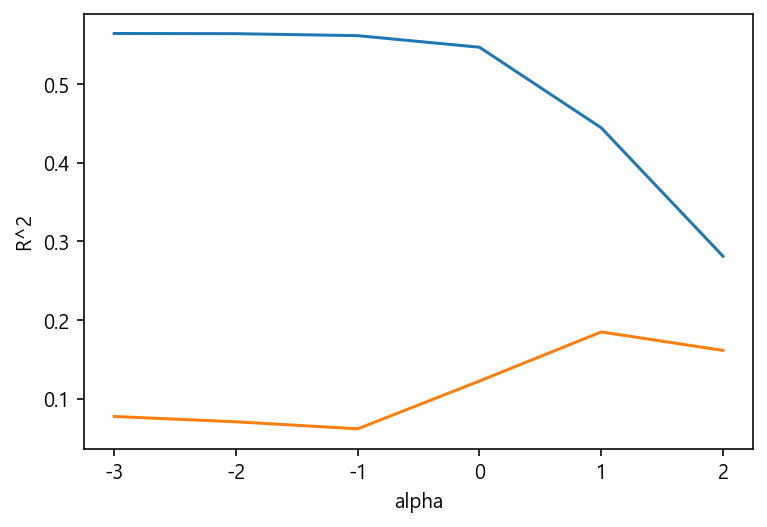

In [341]:
#alpha 값을 0.001에서 100까지 10배씩 늘렸기 때문에 로그함수로 바구어 지수로 표현 - 0.001은 -3 0.01은 -2
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

In [342]:
# 릿지 회귀 (ridge-L2) - sklearn.linear_model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.5550380641729087
0.09387918362109682


조금 오름 그래도 45% 정확도

In [343]:
#라쏘
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.5636110955375909
0.060535535702227805


In [344]:
#적절한 alpha값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []
#lasso 값을 0.001이서 100까지 10배씩 늘려 확인
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for lasso in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

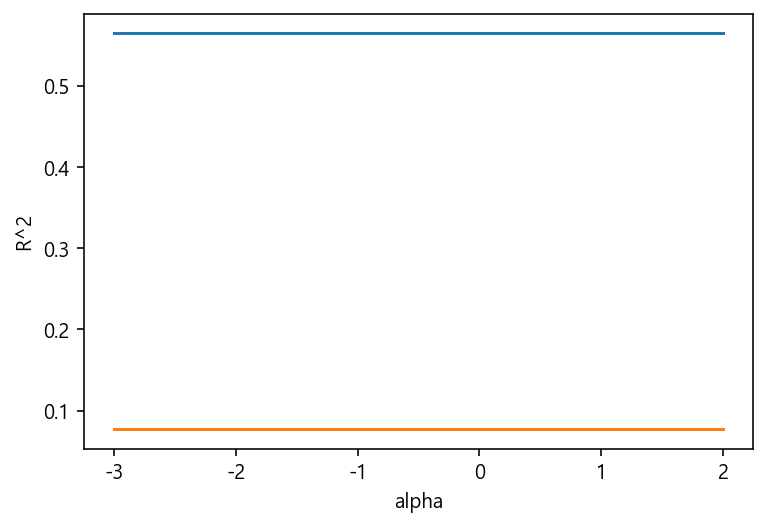

In [345]:
#alpha 값을 0.001에서 100까지 10배씩 늘렸기 때문에 로그함수로 바구어 지수로 표현 - 0.001은 -3 0.01은 -2
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

## 로지스틱 회귀

In [346]:
#로지스틱회귀에 앞서 표준화 작업 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [347]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

#test target값이 없기에 train의 score만 확인함
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.868421052631579
0.0


In [348]:
#그리드 서치 alpha 값 찾기
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(Ridge(), params, n_jobs=-1)
gs.fit(train_scaled, train_target)
print(gs.best_params_)

{'alpha': 100}


In [349]:
# 릿지 회귀 (ridge-L2) - sklearn.linear_model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 100)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.26040393031899534
0.15972490661890704


## 상관관계

In [350]:
heatmap_data = merge_df[['우수중소기업', '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '공공/환경', '시설물', '총 합' ,'평균거리','승하차인원']]

<AxesSubplot:title={'center':'주요시설의 상관관계'}>

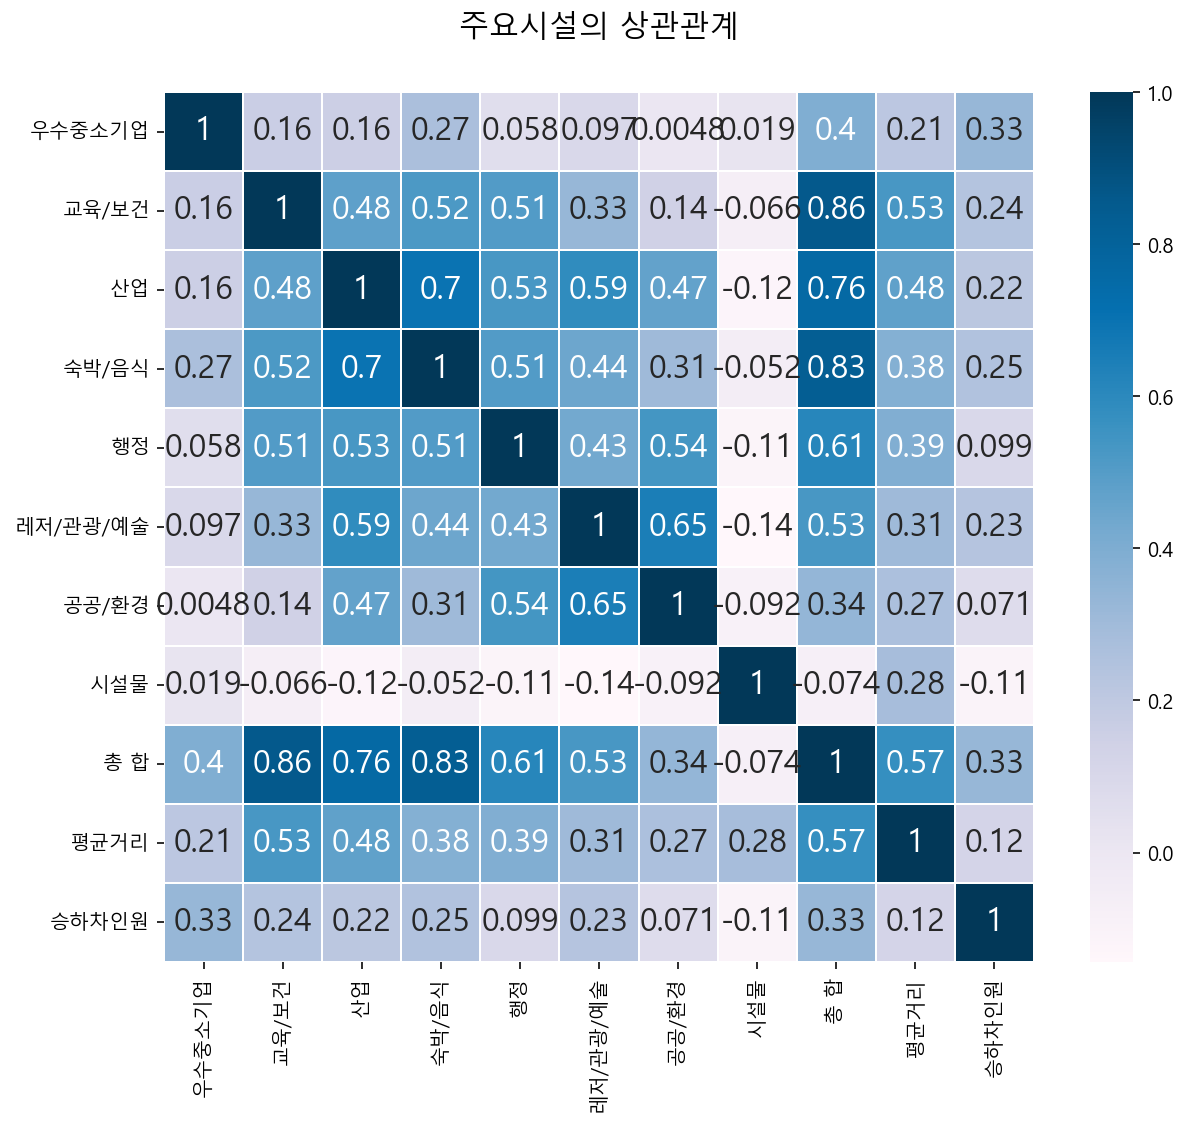

In [351]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("주요시설의 상관관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})